In [1]:
import numpy as np
import pandas as pd
import os

import math
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [2]:
df_train = pd.read_csv('../energy/train.csv', encoding='cp949')
df_test = pd.read_csv('../energy/test.csv', encoding='cp949')

In [3]:
train = df_train.copy()
test = df_test.copy()

In [4]:
train.head()

num      date_time  Ï†ÑÎ†•ÏÇ¨Ïö©Îüâ(kWh)  Í∏∞Ïò®(¬∞C)  ÌíçÏÜç(m/s)  ÏäµÎèÑ(%)  Í∞ïÏàòÎüâ(mm)  ÏùºÏ°∞(hr)  \
0    1  2020-06-01 00    8179.056    17.6      2.5   92.0      0.8     0.0   
1    1  2020-06-01 01    8135.640    17.7      2.9   91.0      0.3     0.0   
2    1  2020-06-01 02    8107.128    17.5      3.2   91.0      0.0     0.0   
3    1  2020-06-01 03    8048.808    17.1      3.2   91.0      0.0     0.0   
4    1  2020-06-01 04    8043.624    17.0      3.3   92.0      0.0     0.0   

   ÎπÑÏ†ÑÍ∏∞ÎÉâÎ∞©ÏÑ§ÎπÑÏö¥ÏòÅ  ÌÉúÏñëÍ¥ëÎ≥¥Ïú†  
0        0.0    0.0  
1        0.0    0.0  
2        0.0    0.0  
3        0.0    0.0  
4        0.0    0.0

In [5]:
test.head()

num      date_time  Í∏∞Ïò®(¬∞C)  ÌíçÏÜç(m/s)  ÏäµÎèÑ(%)  Í∞ïÏàòÎüâ(mm, 6ÏãúÍ∞Ñ)  ÏùºÏ°∞(hr, 3ÏãúÍ∞Ñ)  \
0    1  2020-08-25 00    27.8      1.5   74.0           0.0          0.0   
1    1  2020-08-25 01     NaN      NaN    NaN           NaN          NaN   
2    1  2020-08-25 02     NaN      NaN    NaN           NaN          NaN   
3    1  2020-08-25 03    27.3      1.1   78.0           NaN          0.0   
4    1  2020-08-25 04     NaN      NaN    NaN           NaN          NaN   

   ÎπÑÏ†ÑÍ∏∞ÎÉâÎ∞©ÏÑ§ÎπÑÏö¥ÏòÅ  ÌÉúÏñëÍ¥ëÎ≥¥Ïú†  
0        NaN    NaN  
1        NaN    NaN  
2        NaN    NaN  
3        NaN    NaN  
4        NaN    NaN

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

## 2-1. Ïª¨Îüº Ïù¥Î¶Ñ Î≥ÄÍ≤Ω

In [6]:
cols = ["num", "date_time", "energy", "temp", "windspeed", "humidity", "precipitation", "sun", "cooler", "solar"]
cols2 = ["num", "date_time", "temp", "windspeed", "humidity", "precipitation", "sun", "cooler", "solar"]


train.columns = cols
test.columns = cols2

In [7]:
train.head()

num      date_time    energy  temp  windspeed  humidity  precipitation  \
0    1  2020-06-01 00  8179.056  17.6        2.5      92.0            0.8   
1    1  2020-06-01 01  8135.640  17.7        2.9      91.0            0.3   
2    1  2020-06-01 02  8107.128  17.5        3.2      91.0            0.0   
3    1  2020-06-01 03  8048.808  17.1        3.2      91.0            0.0   
4    1  2020-06-01 04  8043.624  17.0        3.3      92.0            0.0   

   sun  cooler  solar  
0  0.0     0.0    0.0  
1  0.0     0.0    0.0  
2  0.0     0.0    0.0  
3  0.0     0.0    0.0  
4  0.0     0.0    0.0

In [8]:
test.head()

num      date_time  temp  windspeed  humidity  precipitation  sun  cooler  \
0    1  2020-08-25 00  27.8        1.5      74.0            0.0  0.0     NaN   
1    1  2020-08-25 01   NaN        NaN       NaN            NaN  NaN     NaN   
2    1  2020-08-25 02   NaN        NaN       NaN            NaN  NaN     NaN   
3    1  2020-08-25 03  27.3        1.1      78.0            NaN  0.0     NaN   
4    1  2020-08-25 04   NaN        NaN       NaN            NaN  NaN     NaN   

   solar  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

## 2-2. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [9]:
train.isnull().sum()

num              0
date_time        0
energy           0
temp             0
windspeed        0
humidity         0
precipitation    0
sun              0
cooler           0
solar            0
dtype: int64

In [10]:
test.isnull().sum()

num                 0
date_time           0
temp             6720
windspeed        6720
humidity         6720
precipitation    8400
sun              6720
cooler           7784
solar            8456
dtype: int64

### test Îç∞Ïù¥ÌÑ∞Ïóê ÌïúÌï¥ÏÑú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏßÑÌñâ

- **ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨**

Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞Í∞Ä ÏãúÍ≥ÑÏó¥Îç∞Ïù¥ÌÑ∞Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Îã®ÏàúÌûà ÌäπÏ†ï Í∞íÏùÑ ÎåÄÏûÖÌïòÍ∏∞Î≥¥Îã§ 
    
Ìï¥Îãπ Í≤∞Ï∏°ÏπòÏùò Ïïû, Îí§ Í∞íÏóê ÏÑ†ÌòïÏ†ÅÏúºÎ°ú ÎπÑÎ°ÄÌïòÎäî **interpolate Ìï®Ïàò**Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ Ïª¨ÎüºÏùò Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨ÌñàÎã§.

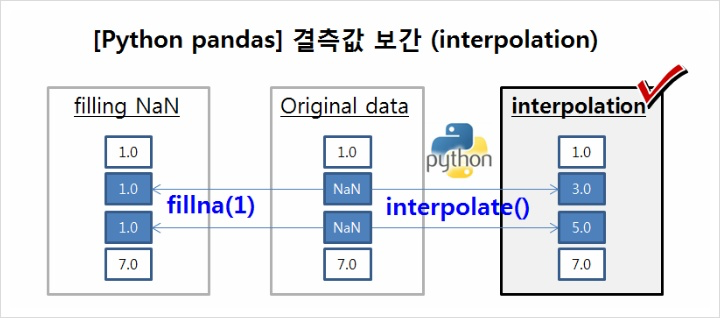

In [11]:
# ÏàòÏπò Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò Î≥¥Í∞ÑÌïòÍ∏∞
test[["temp", "windspeed", "humidity", "precipitation", "sun"]] = test[["temp", "windspeed", "humidity", "precipitation", "sun"]].interpolate(method="values")
pd.options.display.float_format = '{:.2f}'.format
test.head(10)

num      date_time  temp  windspeed  humidity  precipitation  sun  cooler  \
0    1  2020-08-25 00 27.80       1.50     74.00           0.00 0.00     NaN   
1    1  2020-08-25 01 27.63       1.37     75.33           0.00 0.00     NaN   
2    1  2020-08-25 02 27.47       1.23     76.67           0.00 0.00     NaN   
3    1  2020-08-25 03 27.30       1.10     78.00           0.00 0.00     NaN   
4    1  2020-08-25 04 26.90       1.17     79.67           0.00 0.00     NaN   
5    1  2020-08-25 05 26.50       1.23     81.33           0.00 0.00     NaN   
6    1  2020-08-25 06 26.10       1.30     83.00           0.00 0.00     NaN   
7    1  2020-08-25 07 27.00       1.27     81.00           0.00 0.37     NaN   
8    1  2020-08-25 08 27.90       1.23     79.00           0.00 0.73     NaN   
9    1  2020-08-25 09 28.80       1.20     77.00           0.00 1.10     NaN   

   solar  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
5    NaN  
6    NaN  
7    NaN  
8    NaN  
9    NaN

In [12]:
test.isnull().sum()

num                 0
date_time           0
temp                0
windspeed           0
humidity            0
precipitation       0
sun                 0
cooler           7784
solar            8456
dtype: int64

- **Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨**

cooler(ÎπÑÏ†ÑÍ∏∞ÎÉâÎ∞©ÏãúÏÑ§), solar(ÌÉúÏñëÍ¥ëÎ≥¥Ïú†) Ïª¨ÎüºÏùò Í≤ΩÏö∞ Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Ïù¥Î©∞ Í≤∞Ï∏°ÏπòÎ•º Ï†úÏô∏Ìïú Î™®Îì† Í∞íÏùÄ 1Ïù¥Îã§.

Ïù¥Îäî Ìï¥Îãπ ÏãúÏÑ§Ïù¥ Ï°¥Ïû¨Ìï† Í≤ΩÏö∞ 1Ïù¥Î©∞, Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùÑ Í≤ΩÏö∞ Í≤∞Ï∏°ÏπòÎ°ú ÏûÖÎ†•ÎêòÏñ¥ÏûàÎäî Í≤ÉÏúºÎ°ú Ïú†Ï∂îÌï† Ïàò ÏûàÍ≥†,
  
Îî∞ÎùºÏÑú **Í≤∞Ï∏°ÏπòÎ•º 0**ÏúºÎ°ú Ï≤òÎ¶¨ÌñàÎã§.

In [13]:
test = test.fillna(0)

In [14]:
test.isnull().sum()

num              0
date_time        0
temp             0
windspeed        0
humidity         0
precipitation    0
sun              0
cooler           0
solar            0
dtype: int64

In [15]:
test.head()

num      date_time  temp  windspeed  humidity  precipitation  sun  cooler  \
0    1  2020-08-25 00 27.80       1.50     74.00           0.00 0.00    0.00   
1    1  2020-08-25 01 27.63       1.37     75.33           0.00 0.00    0.00   
2    1  2020-08-25 02 27.47       1.23     76.67           0.00 0.00    0.00   
3    1  2020-08-25 03 27.30       1.10     78.00           0.00 0.00    0.00   
4    1  2020-08-25 04 26.90       1.17     79.67           0.00 0.00    0.00   

   solar  
0   0.00  
1   0.00  
2   0.00  
3   0.00  
4   0.00

## 2-3. ÏãúÍ∞Ñ Îç∞Ïù¥ÌÑ∞

- date_time Ïª¨Îüº datetimeÏúºÎ°ú type Î≥ÄÌôò

In [16]:
train["date_time"] = pd.to_datetime(train["date_time"])

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num            122400 non-null  int64         
 1   date_time      122400 non-null  datetime64[ns]
 2   energy         122400 non-null  float64       
 3   temp           122400 non-null  float64       
 4   windspeed      122400 non-null  float64       
 5   humidity       122400 non-null  float64       
 6   precipitation  122400 non-null  float64       
 7   sun            122400 non-null  float64       
 8   cooler         122400 non-null  float64       
 9   solar          122400 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 9.3 MB


In [18]:
train["date"] = train["date_time"].dt.date # Ï†ÑÏ≤¥ ÎÇ†Ïßú
train["month"] = train["date_time"].dt.month # Ïõî
train["day"] = train["date_time"].dt.day # Ïùº
train["hour"] = train["date_time"].dt.hour
train["weekday"] = train["date_time"].dt.weekday # 0: ÏõîÏöîÏùº
train["weekend"] = train["weekday"].isin([5, 6]).astype(int) # 5: ÌÜ†ÏöîÏùº

train.head()

num           date_time  energy  temp  windspeed  humidity  precipitation  \
0    1 2020-06-01 00:00:00 8179.06 17.60       2.50     92.00           0.80   
1    1 2020-06-01 01:00:00 8135.64 17.70       2.90     91.00           0.30   
2    1 2020-06-01 02:00:00 8107.13 17.50       3.20     91.00           0.00   
3    1 2020-06-01 03:00:00 8048.81 17.10       3.20     91.00           0.00   
4    1 2020-06-01 04:00:00 8043.62 17.00       3.30     92.00           0.00   

   sun  cooler  solar        date  month  day  hour  weekday  weekend  
0 0.00    0.00   0.00  2020-06-01      6    1     0        0        0  
1 0.00    0.00   0.00  2020-06-01      6    1     1        0        0  
2 0.00    0.00   0.00  2020-06-01      6    1     2        0        0  
3 0.00    0.00   0.00  2020-06-01      6    1     3        0        0  
4 0.00    0.00   0.00  2020-06-01      6    1     4        0        0

In [19]:
test["date_time"] = pd.to_datetime(test["date_time"])

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   num            10080 non-null  int64         
 1   date_time      10080 non-null  datetime64[ns]
 2   temp           10080 non-null  float64       
 3   windspeed      10080 non-null  float64       
 4   humidity       10080 non-null  float64       
 5   precipitation  10080 non-null  float64       
 6   sun            10080 non-null  float64       
 7   cooler         10080 non-null  float64       
 8   solar          10080 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 708.9 KB


In [21]:
test["date"] = test["date_time"].dt.date # Ï†ÑÏ≤¥ ÎÇ†Ïßú
test["month"] = test["date_time"].dt.month # Ïõî
test["day"] = test["date_time"].dt.day # Ïùº
test["hour"] = test["date_time"].dt.hour
test["weekday"] = test["date_time"].dt.weekday # 0: ÏõîÏöîÏùº
test["weekend"] = test["weekday"].isin([5, 6]).astype(int) # 5: ÌÜ†ÏöîÏùº

test.head()

num           date_time  temp  windspeed  humidity  precipitation  sun  \
0    1 2020-08-25 00:00:00 27.80       1.50     74.00           0.00 0.00   
1    1 2020-08-25 01:00:00 27.63       1.37     75.33           0.00 0.00   
2    1 2020-08-25 02:00:00 27.47       1.23     76.67           0.00 0.00   
3    1 2020-08-25 03:00:00 27.30       1.10     78.00           0.00 0.00   
4    1 2020-08-25 04:00:00 26.90       1.17     79.67           0.00 0.00   

   cooler  solar        date  month  day  hour  weekday  weekend  
0    0.00   0.00  2020-08-25      8   25     0        1        0  
1    0.00   0.00  2020-08-25      8   25     1        1        0  
2    0.00   0.00  2020-08-25      8   25     2        1        0  
3    0.00   0.00  2020-08-25      8   25     3        1        0  
4    0.00   0.00  2020-08-25      8   25     4        1        0

# 3. Feature Engineering

## 3-1. Î∂àÏæåÏßÄÏàò

### 1.8$T$ ‚àí 0.55(1‚àí$RH$)(1.8$T$‚àí26) + 32

$T$=Í∏∞Ïò®(¬∞C), $RH$=ÏÉÅÎåÄÏäµÎèÑ(%)

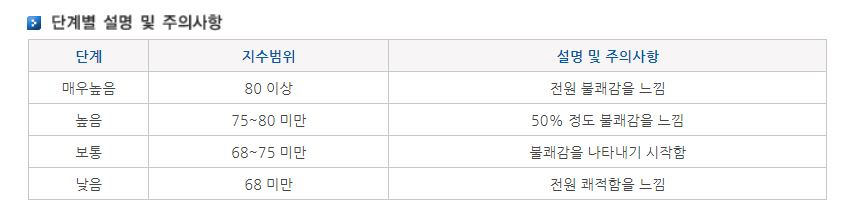

- Í∏∞Ïò®Í≥º ÏäµÎèÑÏùò Ï°∞Ìï©ÏúºÎ°ú ÏÇ¨ÎûåÏù¥ ÎäêÎÅºÎäî Ïò®ÎèÑÎ•º ÌëúÌòÑÌïú Í≤ÉÏúºÎ°ú Ïò®ÏäµÎèÑÏßÄÏàò(THI)
- Î∂àÏæåÏßÄÏàòÎäî Î≥µÏÇ¨ÎÇò Î∞îÎûåÏùò Ï°∞Í±¥ÏùÄ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê Í∑∏ Ï†ÅÏ†ïÌïú ÏÇ¨Ïö©ÏóêÎäî ÌïúÍ≥ÑÍ∞Ä ÏûàÎã§.
- **Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Í∞Ä Ïó¨Î¶ÑÏ≤† Îç∞Ïù¥ÌÑ∞Ïù∏ÎßåÌÅº Ï†ÑÎ†•ÏÇ¨Ïö©ÎüâÍ≥º Í¥ÄÎ†®Ïù¥ ÏûàÏùÑ Í≤É**Ïù¥ÎùºÍ≥† ÌåêÎã®

In [22]:
train['THI'] = 1.8*train['temp'] - 0.55*(1-(train['humidity']/100))*(1.8*train['temp']-26) + 32
test['THI'] = 1.8*test['temp'] - 0.55*(1-(test['humidity']/100))*(1.8*test['temp']-26) + 32

## 3-2. Ï≤¥Í∞êÏò®ÎèÑ

### 13.12 + 0.6125$T$ ‚àí 13.947$V^{0.16}$ + 0.486$T$$V^{0.16}$ 

$T$=Í∏∞Ïò®(¬∞C), $V$=ÌíçÏÜç(m/s)

- Ï≤¥Í∞êÏò®ÎèÑÎäî Î∂àÏæåÏßÄÏàòÏóêÏÑú Ìè¨Ìï®ÌïòÏßÄ ÏïäÏùÄ **Î∞îÎûåÏùò Ï°∞Í±¥ÏùÑ Ìè¨Ìï®**ÌïòÍ≥† ÏûàÏñ¥ Î∂àÏæåÏßÄÏàòÎ•º Î≥¥ÏôÑÌï¥Ï£ºÎäî Î≥ÄÏàòÎùºÍ≥† ÌåêÎã®ÌñàÎã§.

In [23]:
train['sensible'] = 13.12+0.6215*train['temp']-13.947*train['windspeed']**0.16+0.486*train['temp']*train['windspeed']**0.16
test['sensible'] = 13.12+0.6215*test['temp']-13.947*test['windspeed']**0.16+0.486*test['temp']*test['windspeed']**0.16

## 3-3. CDH (Cooling Dgree Hour, ÎÉâÎ∞©ÎèÑÏùº)

‚àë(ÏùºÌèâÍ∑†Í∏∞Ïò®Ôºç24(¬∞C))

- **ÎèÑÏùº(degree day)**: Ïô∏Î∂Ä Í∏∞Ïò®Í≥º Ïã§ÎÇ¥ Í∏∞Ïò®Ïùò Ï∞®ÏôÄ Ïù¥Ïóê Îî∞Îùº ÏÜåÏöîÎêòÎäî Ïó∞Î£å ÏÜåÎπÑÎ•º Í≥†Î†§Ìïú Í∏∞ÌõÑ ÏàòÏπò

- **ÎÉâÎ∞©ÎèÑÏùº(Cooling Degree Day)**: 'ÏùºÌèâÍ∑†Í∏∞Ïò® > Í∏∞Ï°¥ Ïò®ÎèÑ'Ïù∏ ÎÇ†Îì§Ïùò ÏùºÌèâÍ∑†Í∏∞Ïò® - Í∏∞Ï§Ä Ïò®ÎèÑÏôÄÎ•º Íµ¨Ìï¥ Îß§Ïùº ÎàÑÏ†Å Ìï©ÏÇ∞Ìïú Í≤É


- **Ïó¨Í∏∞ÏÑ† DayÍ∞Ä ÏïÑÎãå HourÎ°ú Í∞Å ÏãúÍ∞ÑÎ≥Ñ Ïò®ÎèÑÏôÄ Í∏∞Ï§Ä Ïò®ÎèÑÏùò Ï∞®Î•º Ï†ÅÏÇ∞**ÌïòÏòÄÎã§.


- ÎÉâÎ∞© ÏàòÏöîÏóê ÎåÄÌïú ÏÑ§Î™ÖÎ†•Ïù¥ ÎÜíÏùÄ Î≥ÄÏàòÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ï∂îÍ∞Ä

In [24]:
def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11: 
            ys.append(np.sum(xs[:(i+1)] - 26))
        else:
            ys.append(np.sum(xs[(i-1): (i+1)] - 26))
    return np.array(ys)

In [25]:
def make_CDH(df):
    cdh_str = np.array([])
    for num in range(1, 61):
        temp = df[df["num"] == num]
        cdh = CDH(temp["temp"].values)
        cdh_str = np.concatenate([cdh_str, cdh])
    return cdh_str

# CDH Ïó¥ ÏÉùÏÑ±
train["CDH"] = make_CDH(train)
test["CDH"] = make_CDH(test)

# 4. Í±¥Î¨ºÎ≥Ñ Î∂ÑÏÑù 

In [26]:
train

num           date_time  energy  temp  windspeed  humidity  \
0         1 2020-06-01 00:00:00 8179.06 17.60       2.50     92.00   
1         1 2020-06-01 01:00:00 8135.64 17.70       2.90     91.00   
2         1 2020-06-01 02:00:00 8107.13 17.50       3.20     91.00   
3         1 2020-06-01 03:00:00 8048.81 17.10       3.20     91.00   
4         1 2020-06-01 04:00:00 8043.62 17.00       3.30     92.00   
...     ...                 ...     ...   ...        ...       ...   
122395   60 2020-08-24 19:00:00 4114.37 27.80       2.30     68.00   
122396   60 2020-08-24 20:00:00 3975.70 27.30       1.20     71.00   
122397   60 2020-08-24 21:00:00 3572.21 27.30       1.80     71.00   
122398   60 2020-08-24 22:00:00 3299.18 27.10       1.80     74.00   
122399   60 2020-08-24 23:00:00 3204.58 27.10       2.60     75.00   

        precipitation  sun  cooler  solar        date  month  day  hour  \
0                0.80 0.00    0.00   0.00  2020-06-01      6    1     0   
1                0.30 0.00    0.00   0.00  2020-06-01      6    1     1   
2                0.00 0.00    0.00   0.00  2020-06-01      6    1     2   
3                0.00 0.00    0.00   0.00  2020-06-01      6    1     3   
4                0.00 0.00    0.00   0.00  2020-06-01      6    1     4   
...               ...  ...     ...    ...         ...    ...  ...   ...   
122395           0.00 0.70    1.00   1.00  2020-08-24      8   24    19   
122396           0.00 0.00    1.00   1.00  2020-08-24      8   24    20   
122397           0.00 0.00    1.00   1.00  2020-08-24      8   24    21   
122398           0.00 0.00    1.00   1.00  2020-08-24      8   24    22   
122399           0.00 0.00    1.00   1.00  2020-08-24      8   24    23   

        weekday  weekend   THI  sensible    CDH  
0             0        0 63.43     17.81  -8.40  
1             0        0 63.57     17.78 -16.70  
2             0        0 63.23     17.44 -25.20  
3             0        0 62.54     16.96 -34.10  
4             0        0 62.40     16.80 -43.10  
...         ...      ...   ...       ...    ...  
122395        0        0 77.81     29.90   4.30  
122396        0        0 77.45     29.39   3.10  
122397        0        0 77.45     29.34   2.60  
122398        0        0 77.52     29.11   2.40  
122399        0        0 77.65     29.06   2.20  

[122400 rows x 19 columns]

In [27]:
train.describe()

num    energy      temp  windspeed  humidity  precipitation  \
count 122400.00 122400.00 122400.00  122400.00 122400.00      122400.00   
mean      30.50   2324.83     24.25       2.15     80.17           0.51   
std       17.32   2059.00      3.41       1.51     15.53           2.62   
min        1.00      0.00     11.10       0.00     19.00           0.00   
25%       15.75   1055.27     21.80       1.10     70.00           0.00   
50%       30.50   1700.35     24.20       1.90     84.00           0.00   
75%       45.25   2780.49     26.50       2.90     93.00           0.00   
max       60.00  17739.22     36.30      20.10    100.00          81.50   

            sun    cooler     solar     month       day      hour   weekday  \
count 122400.00 122400.00 122400.00 122400.00 122400.00 122400.00 122400.00   
mean       0.21      0.68      0.48      6.93     14.84     11.50      2.96   
std        0.37      0.47      0.50      0.79      8.45      6.92      2.01   
min        0.00      0.00      0.00      6.00      1.00      0.00      0.00   
25%        0.00      0.00      0.00      6.00      8.00      5.75      1.00   
50%        0.00      1.00      0.00      7.00     15.00     11.50      3.00   
75%        0.30      1.00      1.00      8.00     22.00     17.25      5.00   
max        1.00      1.00      1.00      8.00     31.00     23.00      6.00   

        weekend       THI  sensible       CDH  
count 122400.00 122400.00 122400.00 122400.00  
mean       0.28     73.46     25.94     -3.68  
std        0.45      4.78      3.87      7.69  
min        0.00     52.34     11.94   -101.40  
25%        0.00     70.04     23.17     -8.40  
50%        0.00     73.62     25.85     -3.70  
75%        1.00     77.07     28.46      1.00  
max        1.00     86.66     39.70     19.90

## 4-1. Í±¥Î¨ºÎì§Ïùò ÌèâÍ∑† Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


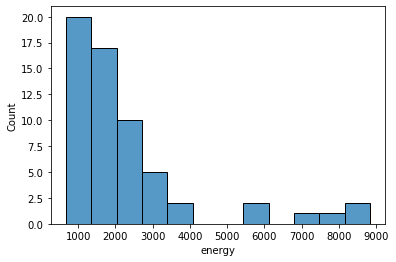

In [28]:
sns.histplot(train.groupby('num')['energy'].mean());

ÌèâÍ∑†Ï†ÅÏúºÎ°ú 1000-3000kWh Ï†ïÎèÑÏùò Ï†ÑÎ†•ÏùÑ ÏÇ¨Ïö©ÌïòÍ≥†, 9000kWhÎ•º Ïì∞Îäî Í±¥Î¨ºÍπåÏßÄ ÏûàÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Ï†ÑÎ†•ÏÇ¨Ïö©ÎüâÏùò Ï¥ùÎüâÏù¥ Îß§Ïö∞ Îã§ÏñëÌïòÎã§Îäî Í≤ÉÏùÑ ÌôïÏù∏ÌñàÎã§.

## 4-2. ÏùºÎ≥Ñ ÌèâÍ∑† Í∏∞Ïò®Í≥º Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ

In [29]:
# Ïó∞ Í∏∞Ï§Ä Î©∞Ïπ†Ïß∏Ïù∏ÏßÄ
train['dayofyear'] = train.date_time.dt.dayofyear 
test['dayofyear'] = test.date_time.dt.dayofyear 

Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞Îäî ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïù¥Îã§. Ïù¥Îü¨Ìïú ÏãúÍ≥ÑÏó¥ÏÑ±(ÏàúÏ∞®Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞)ÏùÑ ÏãúÍ∞ÅÌôîÌïòÍ∏∞ ÏúÑÌï¥ Îã®Ïàú ÎÇ†ÏßúÏù∏ dayÎ≥¥Îã§

ÏãúÍ∞ÑÏùò Í≤ΩÍ≥ºÎ•º ÎÇ¥Ìè¨ÌïòÍ≥† ÏûàÎäî **dayofweek**ÏùÑ ÏÇ¨Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º ÏãúÍ∞ÅÌôîÌïòÍ≥†Ïûê ÌïúÎã§.

- 6Ïõî : 153 ~ 182

- 7Ïõî : 183 ~ 213

- 8Ïõî : 214 ~ 237

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, fla

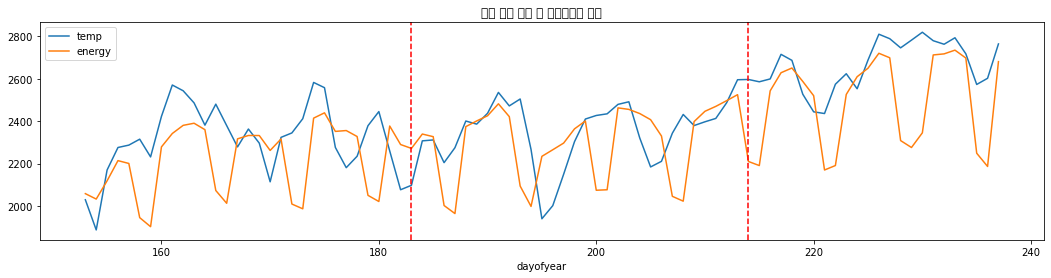

In [30]:
(train.groupby(['dayofyear'])['temp'].mean()*100).plot(figsize=(18, 4))
                                          # Ïôú 100ÏùÑ Í≥±ÌïòÏßÄ????? -> Îã®ÏúÑÎ•º ÎßûÏ∂∞Ï£ºÎ†§Í≥†
train.groupby(['dayofyear'])['energy'].mean().plot(figsize=(18, 4))
plt.legend(['temp', 'energy'])
plt.axvline(x = 183, color = 'r', linestyle = '--',)  # 7Ïõî ÏãúÏûë
plt.axvline(x = 214, color = 'r', linestyle = '--',)  # 8Ïõî ÏãúÏûë
plt.title('ÏùºÎ≥Ñ ÌèâÍ∑† Í∏∞Ïò® Î∞è Ï†ÑÎ†•ÏÇ¨Ïö©Îüâ Ï∂îÏù¥')
plt.show()

Îπ®Í∞Ñ Ï†êÏÑ† : 6, 7, 8Ïõî Íµ¨Î∂Ñ

**7Ïõî Ï¥àÏàú Ïù¥ÌõÑÎ°ú Íæ∏Ï§ÄÌûà ÏÉÅÏäπÌïòÎäî Í≤ΩÌñ•ÏùÑ Î≥¥Ïù¥Î©∞, ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏùÄ Í∏∞Ïò®Í≥º ÎπÑÏä∑Ìïú ÏñëÏÉÅ**ÏùÑ Î≥¥Ïù∏Îã§.

## 4-3. ÏùºÎ≥Ñ ÌèâÍ∑† ÏäµÎèÑ Î∞è Í∏∞Ïò® Ï∂îÏù¥

/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backe

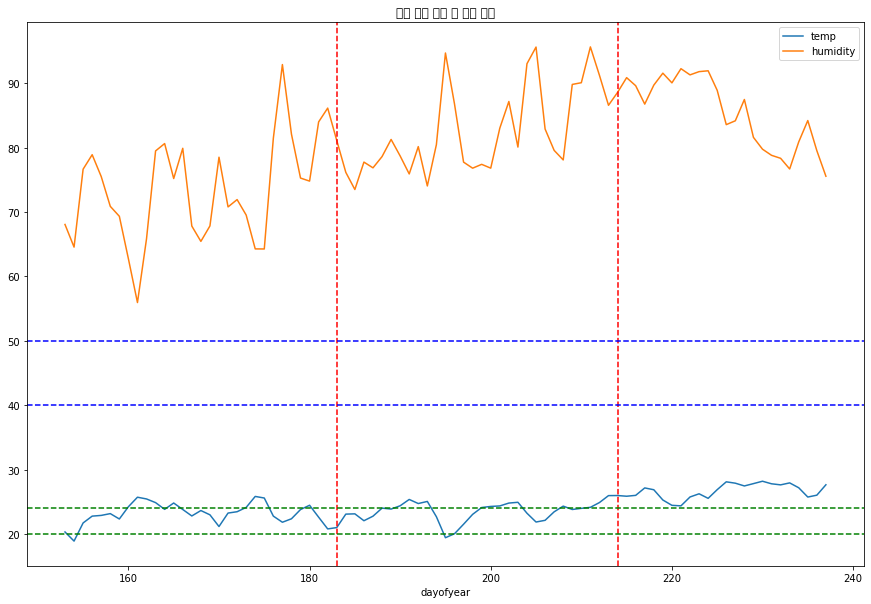

In [31]:
(train.groupby(['dayofyear'])['temp'].mean()).plot(figsize=(15, 10))
train.groupby(['dayofyear'])['humidity'].mean().plot(figsize=(15, 10))
plt.legend(['temp', 'humidity'])


plt.axvline(x = 183, color = 'r', linestyle = '--',)  # 7Ïõî ÏãúÏûë
plt.axvline(x = 214, color = 'r', linestyle = '--',)  # 8Ïõî ÏãúÏûë

plt.axhline(y = 20, color = 'g', linestyle = '--',)  # 20¬∞C
plt.axhline(y = 24, color = 'g', linestyle = '--',)  # 24¬∞C

plt.axhline(y = 40, color = 'b', linestyle = '--',)  # 40%
plt.axhline(y = 50, color = 'b', linestyle = '--',)  # 50%


plt.title('ÏùºÎ≥Ñ ÌèâÍ∑† Í∏∞Ïò® Î∞è ÏäµÎèÑ Ï∂îÏù¥')
plt.show()

- Ïó¨Î¶Ñ Ï†ÅÏ†ï Ïã§ÎÇ¥Ïò®ÎèÑÏôÄ ÏäµÎèÑÎäî? : https://www.korea.kr/news/healthView.do?newsId=148780861
 
ÏúÑ Í∏∞ÏÇ¨Ïóê Îî∞Î•¥Î©¥ ÏæåÏ†ÅÌï®ÏùÑ Ï£ºÎäî ÏäµÎèÑÎäî Ïò®ÎèÑÏóê Îî∞Îùº Îã¨ÎùºÏßÄÎäîÎç∞,

15¬∞CÏóêÏÑúÎäî 70%Ï†ïÎèÑ, 18-20¬∞CÏóêÏÑúÎäî 60%, 21-23¬∞CÏóêÏÑúÎäî 50%, 24¬∞CÏù¥ÏÉÅÏóêÏÑúÎäî 40%Í∞Ä Ï†ÅÎãπÌïú ÏäµÎèÑÎùºÍ≥† ÌïúÎã§.

Ïã§ÎÇ¥ Í∏∞Ï§ÄÏù¥ÏßÄÎßå, ÏÇ¨ÎûåÏù¥ ÏæåÏ†ÅÌï®ÏùÑ ÎäêÎÇÄÎã§Îäî Ï†êÏóêÏÑú Ïã§Ïô∏ Ïò®ÎèÑ, ÏäµÎèÑÏóê ÎåÄÌï¥ÏÑúÎèÑ ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©Ìï† Ïàò ÏûàÎäî Í∏∞Ï§ÄÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïúÎã§.

train Îç∞Ïù¥ÌÑ∞ÏóêÎäî ÎåÄÏ≤¥Ï†ÅÏúºÎ°ú 20-30¬∞C ÏÇ¨Ïù¥Ïùò Í∏∞Ïò®Ïù¥Îã§.

Í∑∏Î†áÎã§Î©¥ Ìï¥Îãπ Í∏∞Ïò®ÏóêÏÑúÎäî 40-50%Ïùò ÏäµÎèÑÍ∞Ä Ï†ÅÏ†ï ÏäµÎèÑÎùºÍ≥† Î≥º Ïàò ÏûàÎäîÎç∞,

Í∑∏Î≥¥Îã§ ÌïúÏ∞∏ ÎÜíÏùÄ ÌèâÍ∑† 80% Ï†ïÎèÑÏùò ÏäµÎèÑÍ∞Ä ÌòïÏÑ±ÎêòÏñ¥ ÏûàÎã§.

ÎçîÎ∂àÏñ¥ Í∏∞Ïò®Ïù¥ ÏÉÅÏäπÌï®Ïóê Îî∞Îùº ÏäµÎèÑ ÎòêÌïú ÏÉÅÏäπÌïòÎäî ÏñëÏÉÅÏùÑ Î≥¥Ïù¥ÎØÄÎ°ú **ÏäµÎèÑÍ∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥ Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ Ï¶ùÍ∞ÄÌïòÎäî ÏñëÏÉÅ**ÏùÑ Î≥¥Ïùº Í≤ÉÏù¥ÎùºÍ≥† ÏòàÏ∏°Ìï† Ïàò ÏûàÎã§.


## 4-4. ÏùºÎ≥Ñ Í∞ïÏàòÎüâ Ï∂îÏù¥

/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/

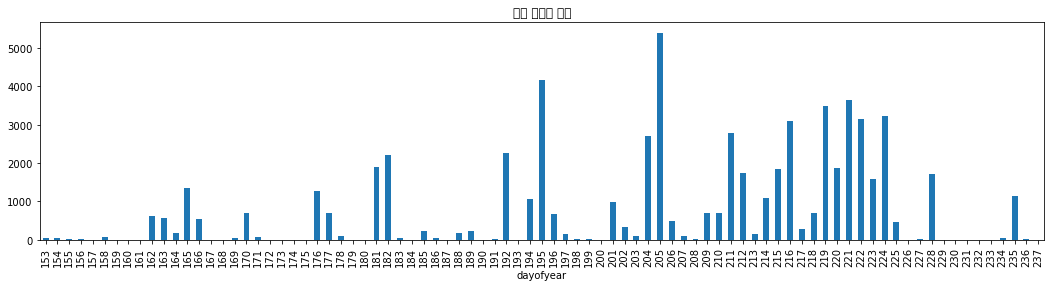

In [32]:
(train.groupby(['dayofyear'])['precipitation'].sum()).plot(kind='bar', figsize=(18, 4))
plt.title('ÏùºÎ≥Ñ Í∞ïÏàòÎüâ Ï∂îÏù¥')
plt.show()

7Ïõî ÎßêÎ∂ÄÌÑ∞ 8Ïõî Ï§ëÏàú(204 ~ 224) ÍπåÏßÄÎäî Í±∞Ïùò Îß§Ïùº ÎπÑÍ∞Ä ÎÇ¥Î¶∞ Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.

Ïù¥Îäî Ïû•ÎßàÍ∏∞Í∞ÑÏúºÎ°ú ÏòàÏ∏°Ìï† Ïàò ÏûàÎã§.

## 4-5. ÏùºÎ≥Ñ ÏùºÏ°∞Îüâ Ï∂îÏù¥

/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0, flags=flags)


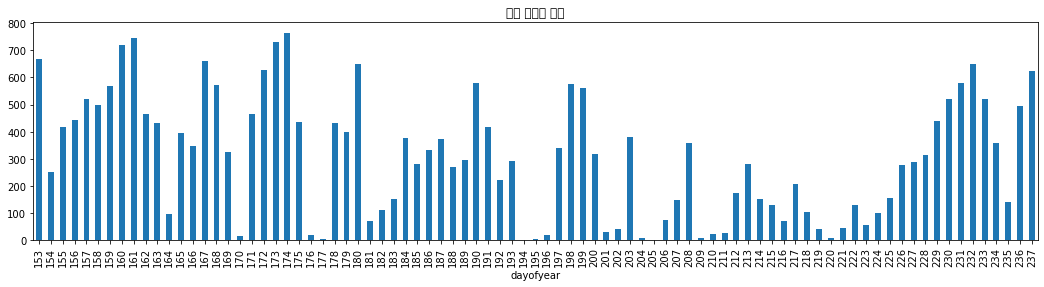

In [33]:
train.groupby(['dayofyear'])['sun'].sum().plot(kind='bar', figsize=(18, 4))
plt.title('ÏùºÎ≥Ñ ÏùºÏ°∞Îüâ Ï∂îÏù¥')
plt.show()

Ïû•Îßà ÏãúÏ¶å(204-224)ÏóêÎäî ÏùºÏ°∞ÏãúÍ∞ÑÏù¥ Ï§ÑÏñ¥Îì§Î©∞, 6Ïõî(153-182)Í≥º 8Ïõî Îßê(229-237)Ïóê ÎÜíÏùÄ ÏùºÏ°∞ÏãúÍ∞ÑÏùÑ Î≥¥Ïù¥Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.

Ïù¥Î•º ÌÜµÌï¥ Í∞ïÏàòÎüâÍ≥º ÏùºÏ°∞ÎüâÏùÄ **Í∞ïÏàòÎüâÏù¥ Ï¶ùÍ∞ÄÌïòÎ©¥ ÏùºÏ°∞ÎüâÏùÄ ÎÇÆÏïÑÏßÄÎäî trade-off Í¥ÄÍ≥Ñ**Ïùº Í≤ÉÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÎêúÎã§.

### ÏúÑ Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Ïïå Ïàò ÏûàÎäî Í≤ÉÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§.

- 6Ïõî, 7ÏõîÎ≥¥Îã§ 8Ïõî ÎßêÎ°ú Í∞àÏàòÎ°ù ÎçîÏö± Í∏∞Ïò®ÏùÄ ÎÜíÏïÑÏßÑÎã§.


- Í∏∞Ïò®Í≥º ÏäµÎèÑÍ∞Ä ÎÜíÏïÑÏßêÏóê Îî∞Îùº Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÎèÑ Í∞ôÏù¥ ÎÜíÏïÑÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§.


- 7Ïõî ÎßêÎ∂ÄÌÑ∞ Ïû•ÎßàÏùò ÏòÅÌñ•ÏùÑ Î∞õÏúºÎ©∞ ÎπÑÎÇ¥Î¶¨Îäî ÎÇ†Ïù¥ ÎßéÏïÑÏßÑÎã§.


- 8Ïõî ÎßêÏóêÎäî Ïû•ÎßàÍ∞Ä ÎÅùÎÇòÎ©∞, ÎπÑÍ∞Ä Ïò§Îäî ÎÇ†Ïù¥ Í±∞Ïùò ÏóÜÎã§.


- ÏùºÏ°∞ ÏãúÍ∞ÑÏùÄ 6ÏõîÏóê Í∞ÄÏû• ÎÜíÏïòÍ≥†, Ïû•Îßà ÏãúÏ¶åÏóê Ï§ÑÏñ¥Îì§ÏóàÏúºÎ©∞, 8ÏõîÏóê Îã§Ïãú Ïò§Î•¥Í≥† ÏûàÎã§.

## 4-6. ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ

/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backe

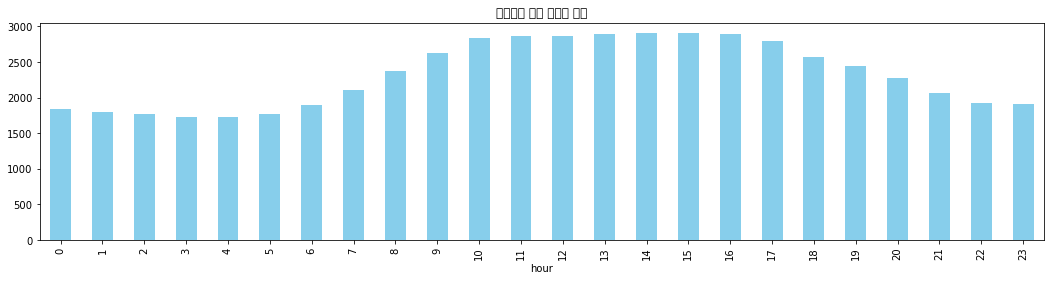

In [34]:
train.groupby(['hour'])['energy'].mean().plot(kind='bar', color='skyblue', figsize=(18, 4))
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ Ï∂îÏù¥')
plt.show()

ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ Ï∂îÏù¥Î•º ÌôïÏù∏Ìï¥Î≥∏ Í≤∞Í≥º **13-16ÏãúÏóê Í∞ÄÏû• ÎßéÏùÄ Ï†ÑÎ†•ÏùÑ ÏÇ¨Ïö©**ÌïòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. 

## 4-7. ÎπÑÏ†ÑÍ∏∞ ÎÉâÎ∞© ÏãúÏÑ§(Cooler) ÏÑ§Ïπò Ïó¨Î∂ÄÏóê Îî∞Î•∏ Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ
- ÎπÑÏ†ÑÍ∏∞ ÎÉâÎ∞© ÏãúÏÑ§Ïùò ÏÑ§Ïπò Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÎèôÏùº ÏãúÍ∞ÑÎåÄ(ÌîºÌÅ¨ ÏãúÍ∞Ñ) Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏùÑ ÏÇ∞Ï†êÎèÑÎ°ú ÎπÑÍµê

- 4-6ÏóêÏÑú Íµ¨Ìïú Ïó¨Î¶ÑÏ≤† ÌîºÌÅ¨ ÏãúÍ∞ÑÎåÄ(14Ïãú)

Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞Í∞Ä ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú **8ÏõîÏùò Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ**ÏùÑ ÌÜµÌï¥ ÎπÑÍµêÎ•º ÏßÑÌñâÌïòÍ≥†Ïûê ÌïúÎã§.

6, 7ÏõîÏùò Í≤ΩÏö∞ ÏïÑÏßÅ ÎπÑÏ†ÑÍ∏∞ ÎÉâÎ∞© ÏãúÏÑ§ÏùÑ ÏÑ§ÏπòÌïòÏßÄ ÏïäÏïòÏùÑ ÏàòÎèÑ ÏûàÍ≥†,

ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÎπÑÏ†ÑÍ∏∞ ÎÉâÎ∞© ÏãúÏÑ§ÏùÑ 6, 7ÏõîÏóê ÏÑ§ÏπòÌñàÎã§Í∞Ä 8ÏõîÏóê Ï†úÍ±∞ÌñàÏùÑ Í≤ΩÏö∞Îäî Í±∞Ïùò ÏóÜÏùÑ Í≤ÉÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÎêòÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.

In [35]:
# 'energy' Ïä§ÏºÄÏùºÎßÅ
for i in range(1, 61):
    mean_ = train.loc[train.num == i].energy.mean()
    std_ = train.loc[train.num == i].energy.std()
    train.loc[train.num == i, 'energy_sc'] = ((train.loc[train.num == i, 'energy']) - mean_) / std_
print(train['energy_sc'])

0        -2.80
1        -3.13
2        -3.35
3        -3.80
4        -3.84
          ... 
122395    1.84
122396    1.50
122397    0.53
122398   -0.13
122399   -0.36
Name: energy_sc, Length: 122400, dtype: float64


In [36]:
# Ïó¨Î¶ÑÏ≤† ÌîºÌÅ¨ ÏãúÍ∞ÑÎåÄ 14Ïãú
peak_df_1_8 = train.loc[(train.month == 8) & (train.hour == 14) & (train.cooler == 1)]
peak_df_0_8 = train.loc[(train.month == 8) & (train.hour == 14) & (train.cooler == 0)]

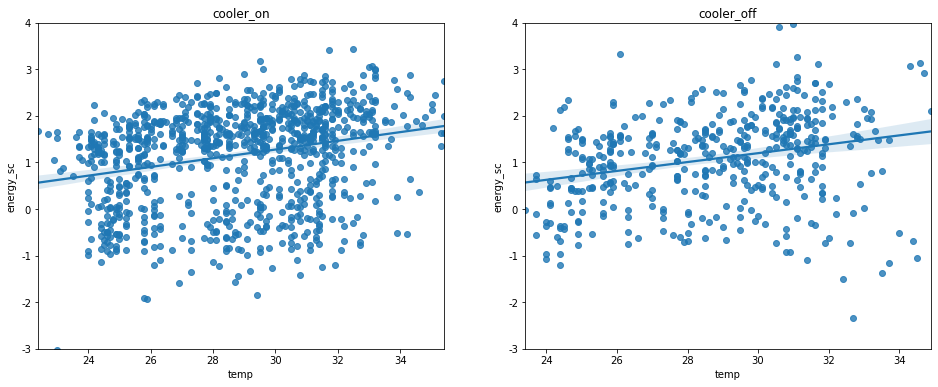

In [37]:
fig = plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title("cooler_on")
sns.regplot(data=peak_df_1_8, x='temp', y='energy_sc')
plt.ylim(top=4, bottom=-3)

plt.subplot(1, 2, 2)
plt.title("cooler_off")
sns.regplot(data=peak_df_0_8, x='temp', y='energy_sc')
plt.ylim(top=4, bottom=-3)

plt.show()

- **Cooler ÏÑ§Ïπò Í±¥Î¨º Í∞úÎ≥Ñ ÏãúÍ∞ÅÌôî**

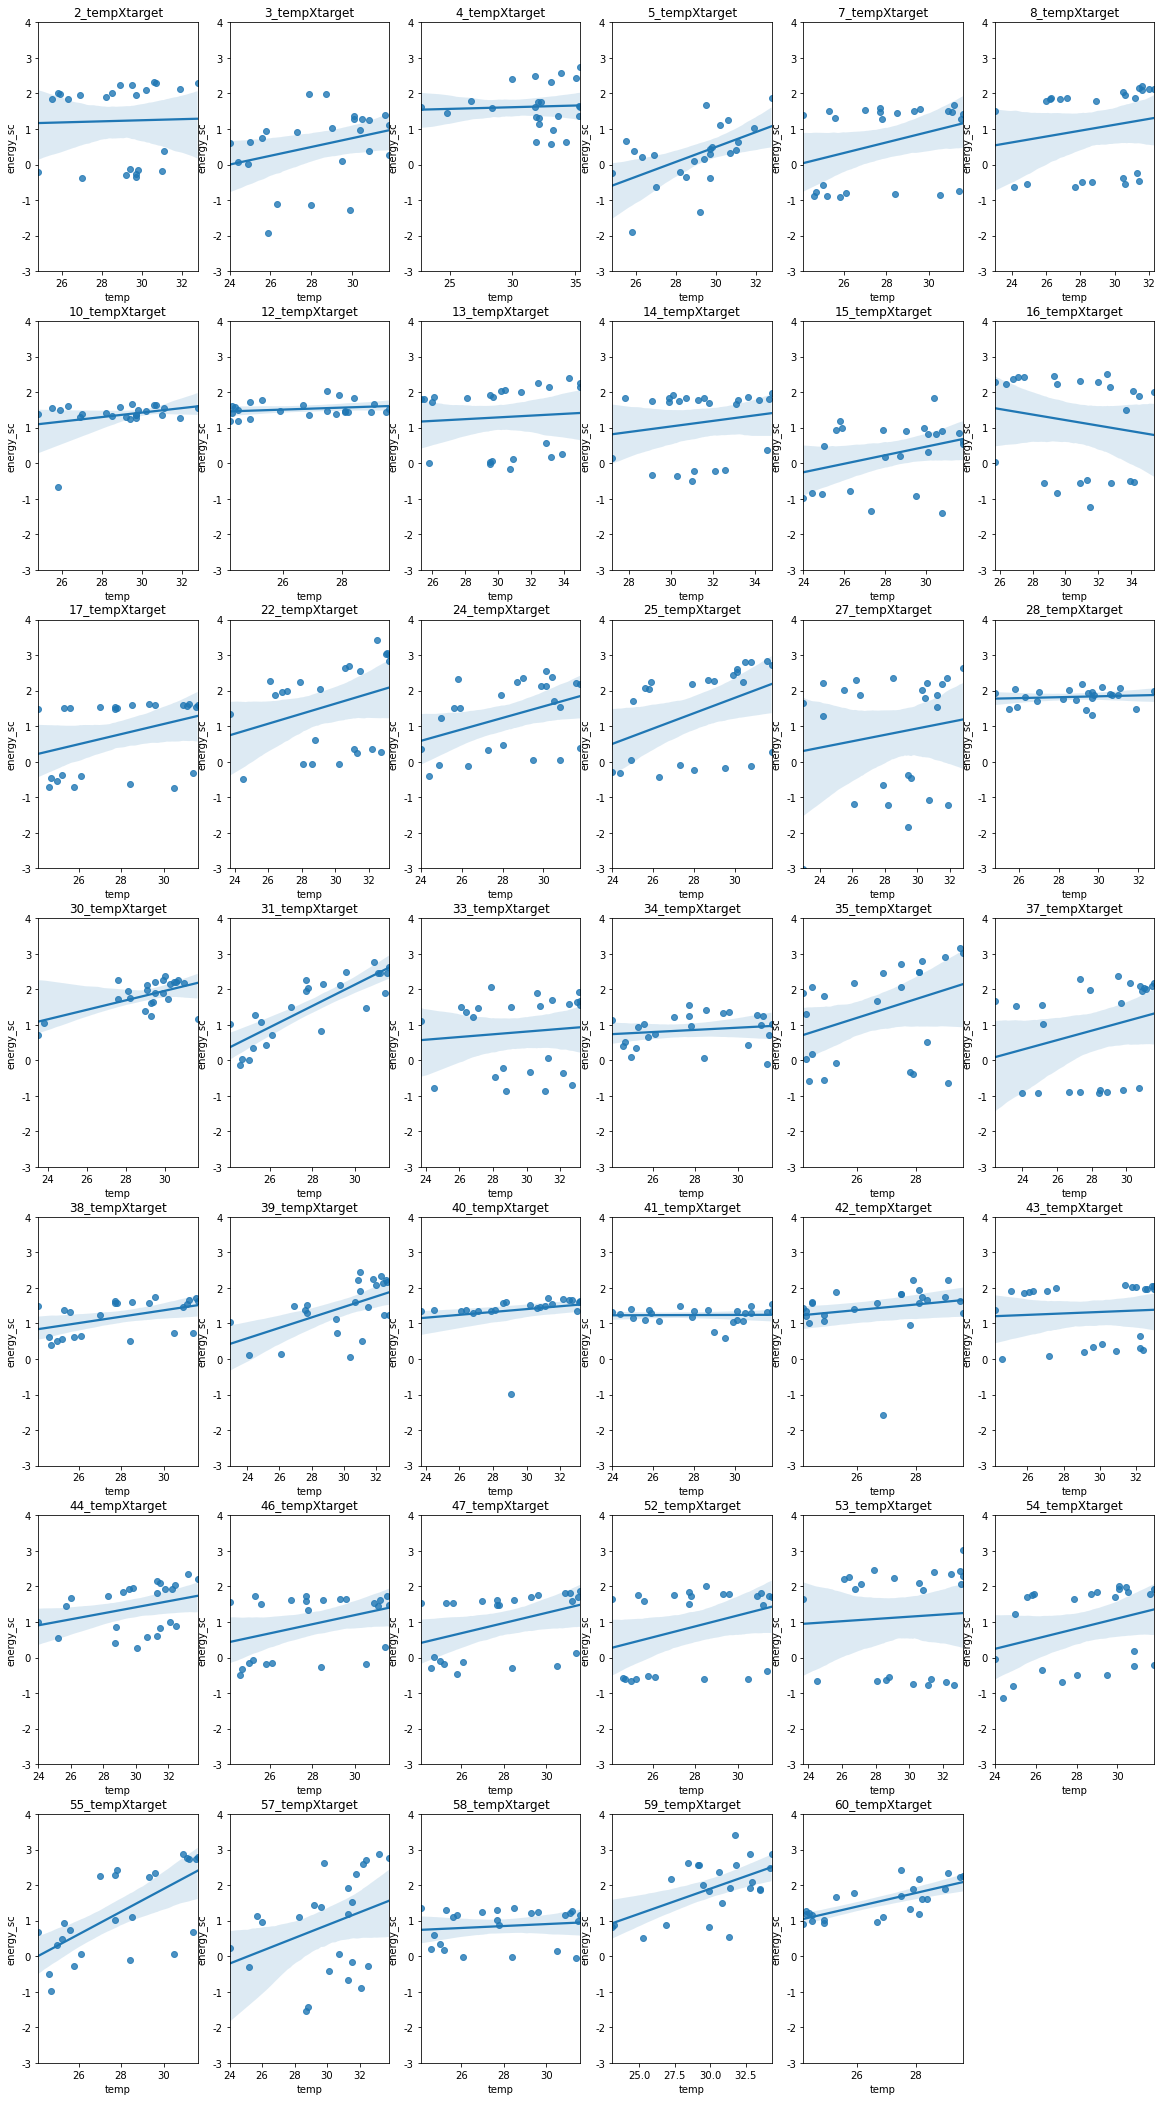

In [38]:
fig = plt.figure(figsize=(20, 65))
for i, n in enumerate(peak_df_1_8.num.unique()):
    plt.subplot(12, 6, i+1)
    plt.title("{}_tempXtarget".format(n))
    sns.regplot(data=peak_df_1_8.loc[peak_df_1_8.num == n], x='temp', y='energy_sc')
    plt.ylim(top=4, bottom=-3)

- **Cooler ÎØ∏ÏÑ§Ïπò Í±¥Î¨º**

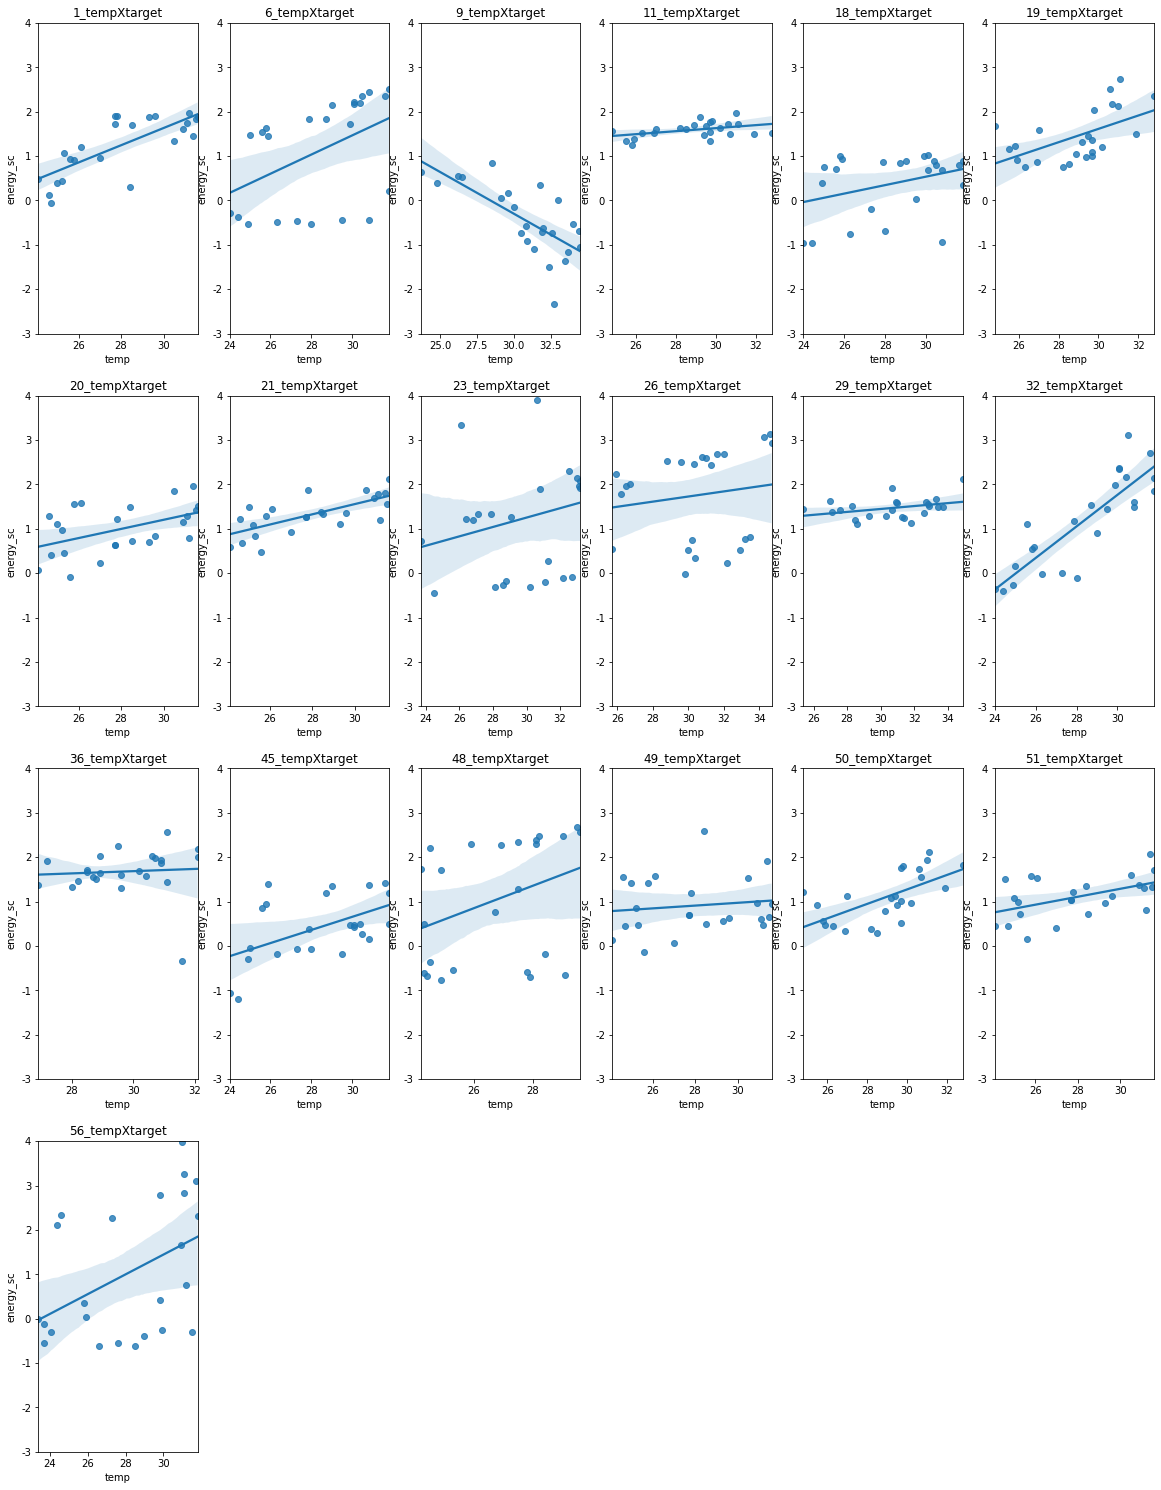

In [39]:
fig = plt.figure(figsize=(20, 40))
for i, n in enumerate(peak_df_0_8.num.unique()):
    plt.subplot(6, 6, i+1)
    plt.title("{}_tempXtarget".format(n))
    sns.regplot(data=peak_df_0_8.loc[peak_df_0_8.num == n], x='temp', y='energy_sc')
    plt.ylim(top=4, bottom=-3)

Ïõî Î≥Ñ ÌîºÌÅ¨ ÏãúÍ∞ÑÎåÄ(14Ïãú)Ïùò ÎπÑÏ†ÑÍ∏∞ ÎÉâÎ∞© ÏãúÏÑ§ ÏÑ§Ïπò Ïú†Î¨¥Î≥Ñ Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏùÑ ÏãúÍ∞ÅÌôîÌï¥Î≥¥ÏïòÎã§.

CoolerÎ•º ÏÑ§ÏπòÌïú Í±¥Î¨ºÍ≥º ÏÑ§ÏπòÌïòÏßÄ ÏïäÏùÄ Í±¥Î¨ºÏùò ÎöúÎ†∑Ìïú Ï∞®Ïù¥Îäî Î≥¥Ïù¥ÏßÄ ÏïäÏßÄÎßå 

CoolerÎ•º ÏÑ§ÏπòÌïú Í±¥Î¨ºÏùÄ Í∑∏Î†áÏßÄ ÏïäÏùÄ Í±¥Î¨ºÏóê ÎπÑÌï¥ Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ ÎÜíÍ≤å ÌòïÏÑ±ÎêòÏñ¥ ÏûàÎã§.

Ï¶â, **CoolerÎ•º ÏÑ§ÏπòÌïú Í±¥Î¨ºÎì§ÏùÄ Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ ÎßéÏùÄ Í±¥Î¨ºÎì§Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§.**

ÎπÑÏ†ÑÍ∏∞ ÎÉâÎ∞© ÏãúÏÑ§(Cooler)ÏùÑ ÏÑ§ÏπòÌïòÎ©¥ Í∑∏ÎßåÌÅº Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ Ï§ÑÏñ¥Îì§Ïñ¥ ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ Ï†ÅÏùÄ Í±¥Î¨ºÏùº Í≤ÉÏù¥ÎùºÍ≥† ÏòàÏÉÅÌñàÎäîÎç∞,

Ïù¥ÎØ∏ Ï†ÑÎ†•ÏùÑ ÎßéÏù¥ ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÏñ¥ ÎπÑÏ†ÑÍ∏∞ ÎÉâÎ∞© ÏãúÏÑ§ÍπåÏßÄ ÎèÑÏûÖÌïú Í≤ÉÏúºÎ°ú Ïú†Ï∂îÌï¥Î≥º Ïàò ÏûàÎã§.

-----------------

# 4-8, 4-9 Î∂ÄÎ∂ÑÏùÄ ÏàòÏ†ï ÏòàÏ†ïÏûÖÎãàÎã§ !!!

## 4-8. ÌÉúÏñëÍ¥ë ÏÑ§Ïπò Ïó¨Î∂ÄÏóê Îî∞Î•∏ Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ

- ÌÉúÏñëÍ¥ë Ïú†Î¨¥Ïóê Îî∞Îùº Ï†ÑÎ†•ÏÇ¨Ïö©Îüâ, Î∂àÏæåÏßÄÏàò, ÌÉúÏñëÍ¥ë Î∞úÏ†ÑÎüâÏùÑ Ìï®Íªò ÎπÑÍµê
- sun : ÏùºÏ°∞
- solar : ÌÉúÏñëÍ¥ëÎ≥¥Ïú† Ïó¨Î∂Ä (ÏÑ§Ïπò : 1, ÎØ∏ÏÑ§Ïπò : 0)
- solar power : ÌÉúÏñëÍ¥ë Î∞úÏ†ÑÎüâ

In [40]:
#ÌÉúÏñëÍ¥ë Î∞úÏ†ÑÎüâ Ïª¨Îüº ÏÉùÏÑ±
train['solar power'] =  train['sun'] * train['solar'] * train['precipitation'].map(lambda x : np.exp(-x)) * train['windspeed'] / train['humidity'] * 100

In [41]:
train[train['solar'] == 1]

num           date_time  energy  temp  windspeed  humidity  \
4080      3 2020-06-01 00:00:00 3183.62 17.00       2.00    100.00   
4081      3 2020-06-01 01:00:00 3171.64 17.20       2.30     99.00   
4082      3 2020-06-01 02:00:00 3175.74 17.20       3.70     98.00   
4083      3 2020-06-01 03:00:00 3194.86 16.70       3.10     99.00   
4084      3 2020-06-01 04:00:00 3198.53 16.90       3.50     98.00   
...     ...                 ...     ...   ...        ...       ...   
122395   60 2020-08-24 19:00:00 4114.37 27.80       2.30     68.00   
122396   60 2020-08-24 20:00:00 3975.70 27.30       1.20     71.00   
122397   60 2020-08-24 21:00:00 3572.21 27.30       1.80     71.00   
122398   60 2020-08-24 22:00:00 3299.18 27.10       1.80     74.00   
122399   60 2020-08-24 23:00:00 3204.58 27.10       2.60     75.00   

        precipitation  sun  cooler  solar  ... day  hour  weekday  weekend  \
4080             1.10 0.00    1.00   1.00  ...   1     0        0        0   
4081             0.10 0.00    1.00   1.00  ...   1     1        0        0   
4082             0.00 0.00    1.00   1.00  ...   1     2        0        0   
4083             0.00 0.00    1.00   1.00  ...   1     3        0        0   
4084             0.00 0.00    1.00   1.00  ...   1     4        0        0   
...               ...  ...     ...    ...  ...  ..   ...      ...      ...   
122395           0.00 0.70    1.00   1.00  ...  24    19        0        0   
122396           0.00 0.00    1.00   1.00  ...  24    20        0        0   
122397           0.00 0.00    1.00   1.00  ...  24    21        0        0   
122398           0.00 0.00    1.00   1.00  ...  24    22        0        0   
122399           0.00 0.00    1.00   1.00  ...  24    23        0        0   

         THI  sensible    CDH  dayofyear  energy_sc  solar power  
4080   62.60     17.33  -9.00        153      -1.06         0.00  
4081   62.93     17.43 -17.80        153      -1.13         0.00  
4082   62.91     16.92 -26.60        153      -1.11         0.00  
4083   62.04     16.51 -35.90        153      -1.00         0.00  
4084   62.37     16.62 -45.00        153      -0.98         0.00  
...      ...       ...    ...        ...        ...          ...  
122395 77.81     29.90   4.30        237       1.84         2.37  
122396 77.45     29.39   3.10        237       1.50         0.00  
122397 77.45     29.34   2.60        237       0.53         0.00  
122398 77.52     29.11   2.40        237      -0.13         0.00  
122399 77.65     29.06   2.20        237      -0.36         0.00  

[59160 rows x 22 columns]

In [42]:
print('ÌÉúÏñëÍ¥ë ÏÑ§Ïπò Í±¥Î¨º Î≤àÌò∏ :', train[train['solar'] == 1]['num'].unique())

ÌÉúÏñëÍ¥ë ÏÑ§Ïπò Í±¥Î¨º Î≤àÌò∏ : [ 3  4  8  9 12 14 16 21 23 24 26 27 30 34 36 37 38 39 40 42 43 44 45 47
 51 52 55 56 60]


## 4-9. Í∏∞Ïò®, Î∂àÏæåÏßÄÏàòÏóê Îî∞Î•∏ Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ

In [43]:
# THI 80 Ïù¥ÏÉÅÏù¥Î©¥ 50% Ï†ïÎèÑ Î∂àÏæåÍ∞êÏùÑ ÎäêÎÇå
train['feel_THI'] = train['THI'].map(lambda x : 1 if x > 80 else 0)
train['feel_THI'].value_counts()

0    112635
1      9765
Name: feel_THI, dtype: int64

In [44]:
train['THI_c']=pd.cut(train.THI, bins=[50, 68, 75, 80, 90], labels=["Low", "Ordinary", "High", "Very High"])

train['THI_c'].unique()

['Low', 'Ordinary', 'High', 'Very High']
Categories (4, object): ['Low' < 'Ordinary' < 'High' < 'Very High']

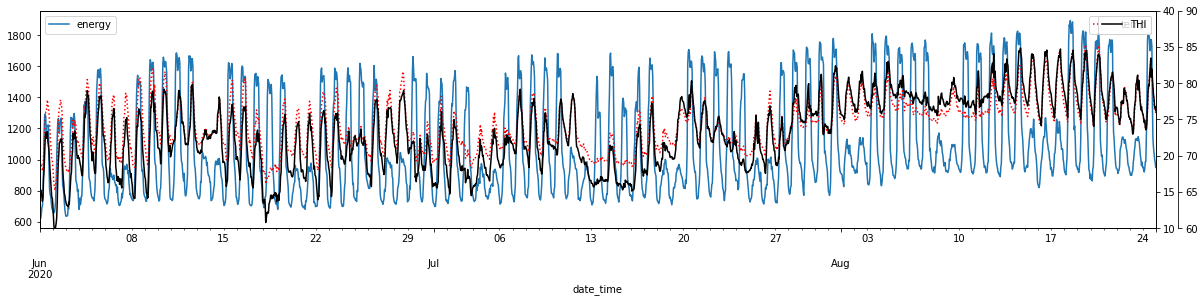

In [45]:
i = 13

fig, ax1 = plt.subplots(figsize = (20, 4))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.02))
# ax3.set_frame_on(True)
# ax3.patch.set_visible(False)
train[train['num'] == i].plot(x = 'date_time', y = ['energy'], ax = ax1)
train[train['num'] == i].plot(x = 'date_time', y = ['temp'], ax = ax2, color = 'r', ls = 'dotted')
train[train['num'] == i].plot(x = 'date_time', y = ['THI'], ax = ax3, color = 'k')

ax2.set_ylim(10, 40)
ax3.set_ylim(60, 90)

plt.show()

----------------------

## 4-10. Í±¥Î¨ºÎì§Ïùò ÏöîÏùºÎ≥Ñ, ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ

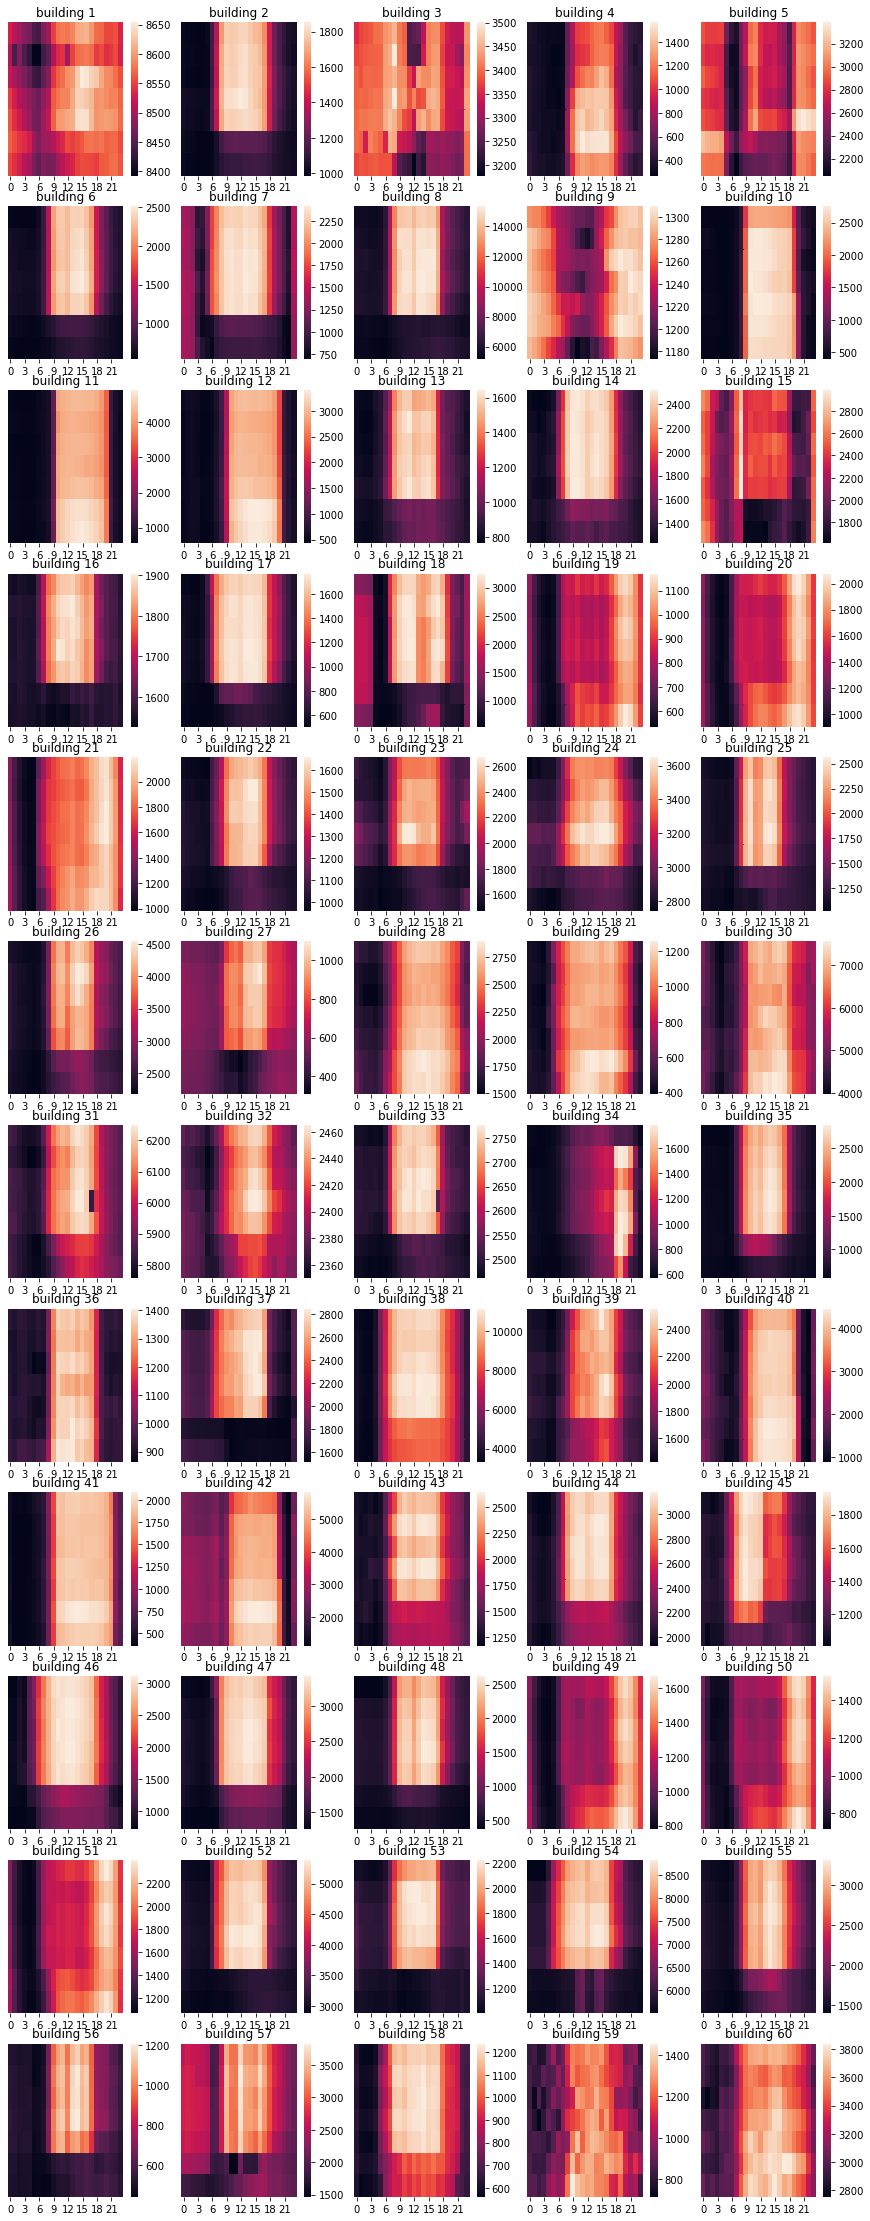

In [46]:
fig = plt.figure(figsize = (15, 40))
for num in train['num'].unique():
    df = train[train.num == num]
    df = df.groupby(['weekday', 'hour'])['energy'].mean().reset_index().pivot('weekday', 'hour', 'energy')
    plt.subplot(12, 5, num)
    sns.heatmap(df)
    plt.title(f'building {num}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

Í±¥Î¨ºÎ≥ÑÎ°ú ÏÉÅÏù¥Ìïú Ìå®ÌÑ¥Ïù¥ Î≥¥Ïù¥ÎäîÎç∞, ÎåÄÌëúÏ†ÅÏúºÎ°ú Îëê Í∞ÄÏßÄ Ìå®ÌÑ¥Ïù¥ Î≥¥Ïù∏Îã§.

- ÌèâÏùº ÎÇÆÏóêÎßå Ï†ÑÎ†•ÏÇ¨Ïö©ÎüâÏù¥ ÎÜíÏùÄ Í±¥Î¨º


- ÌèâÏùº Ï£ºÎßê ÏÉÅÍ¥ÄÏóÜÏù¥ ÎÇÆÏóêÎßå Ï†ÑÎ†•ÏÇ¨Ïö©ÎüâÏù¥ ÎÜíÏùÄ Í±¥Î¨º

Ïù¥Ï≤òÎüº 60Í∞úÏùò Í±¥Î¨ºÏ§ëÏóêÏÑúÎèÑ ÎπÑÏä∑Ìïú ÏñëÏÉÅÏùÑ Î≥¥Ïù¥Îäî Í±¥Î¨ºÎì§Ïù¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê

ÏúÑÏùò ÌûàÌä∏ÎßµÏóêÏÑú ÏÇ¨Ïö©Ìïú ÏöîÏùºÎ≥Ñ, ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ ÏßÄÌëúÎ•º ÌôúÏö©Ìï¥ Í±¥Î¨ºÎì§ÏùÑ Íµ∞ÏßëÌôîÌïòÏó¨

**Íµ∞Ïßë Î≥Ñ Î∂ÑÏÑù**ÏùÑ ÏßÑÌñâÌï¥Î≥¥Í≥†Ïûê ÌïúÎã§.

# 5. Íµ∞Ïßë Î∂ÑÏÑù

## 5-1.  Íµ∞ÏßëÌôî ÏßÄÌëú

### 5-1-1. ÏöîÏùº Î≥Ñ Ï†ÑÎ†•Îüâ median

In [47]:
by_weekday = train.groupby(['num', 'weekday'])["energy"].median().reset_index()
by_weekday = by_weekday.pivot('num', 'weekday', 'energy').reset_index()

In [48]:
by_weekday.head()

weekday  num       0       1       2       3       4       5       6
0          1 8565.59 8552.63 8567.21 8574.34 8563.00 8535.78 8521.52
1          2 1261.01 1304.10 1303.78 1318.36 1300.05 1074.55 1056.73
2          3 3369.36 3351.83 3381.48 3382.67 3374.50 3260.74 3250.80
3          4  538.49  547.99  554.26  582.98  612.36  602.64  608.26
4          5 2761.99 2732.18 2730.24 2650.75 2880.79 2747.74 2585.95

### 5-1-2. ÏãúÍ∞Ñ Î≥Ñ Ï†ÑÎ†•Îüâ median

In [49]:
by_hour = train.groupby(['num', 'hour'])["energy"].median().reset_index()
by_hour = by_hour.pivot("num", "hour", "energy").reset_index().drop('num', axis=1)

In [50]:
by_hour.head()

hour      0       1       2       3       4       5       6       7       8   \
0    8546.47 8526.38 8515.37 8505.00 8498.52 8458.34 8458.34 8480.38 8501.11   
1    1008.29 1001.16  993.71  987.88  983.99  991.44 1111.64 1318.36 1612.87   
2    3274.88 3272.40 3262.90 3276.29 3291.30 3293.24 3320.78 3341.20 3363.12   
3     372.82  355.10  344.30  335.23  309.31  309.31  308.02  324.86  647.57   
4    2999.81 2920.32 2919.89 2912.98 2890.08 2407.10 2198.88 2095.20 2386.80   

hour      9   ...      14      15      16      17      18      19      20  \
0    8541.94  ... 8600.26 8607.38 8606.09 8598.96 8576.28 8586.00 8573.69   
1    1711.37  ... 1707.48 1697.11 1693.22 1622.27 1367.28 1204.96 1124.60   
2    3373.38  ... 3388.34 3385.15 3406.21 3394.87 3334.18 3295.51 3290.76   
3     899.86  ... 1294.70 1288.22 1236.38 1121.47  917.57  748.22  566.35   
4    2557.01  ... 2630.88 2667.60 2584.22 2552.26 2344.90 2788.99 3132.00   

hour      21      22      23  
0    8577.58 8577.58 8558.78  
1    1078.92 1039.07 1021.25  
2    3283.52 3283.74 3327.59  
3     479.52  405.22  422.50  
4    3111.70 3091.82 3013.20  

[5 rows x 24 columns]

### 5-1-3. ÏöîÏùº, ÏãúÍ∞Ñ Î≥Ñ Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏùò median

In [51]:
df_wh = pd.concat([by_weekday, by_hour], axis=1) # Ïó¥ Î∞©Ìñ•ÏúºÎ°ú Ìï©ÏπòÍ∏∞
columns = ["num"] + ["day" + str(i) for i in range(7)] + ["hour" + str(i) for i in range(24)]
df_wh.columns = columns

df_wh.head()

num    day0    day1    day2    day3    day4    day5    day6   hour0  \
0    1 8565.59 8552.63 8567.21 8574.34 8563.00 8535.78 8521.52 8546.47   
1    2 1261.01 1304.10 1303.78 1318.36 1300.05 1074.55 1056.73 1008.29   
2    3 3369.36 3351.83 3381.48 3382.67 3374.50 3260.74 3250.80 3274.88   
3    4  538.49  547.99  554.26  582.98  612.36  602.64  608.26  372.82   
4    5 2761.99 2732.18 2730.24 2650.75 2880.79 2747.74 2585.95 2999.81   

    hour1  ...  hour14  hour15  hour16  hour17  hour18  hour19  hour20  \
0 8526.38  ... 8600.26 8607.38 8606.09 8598.96 8576.28 8586.00 8573.69   
1 1001.16  ... 1707.48 1697.11 1693.22 1622.27 1367.28 1204.96 1124.60   
2 3272.40  ... 3388.34 3385.15 3406.21 3394.87 3334.18 3295.51 3290.76   
3  355.10  ... 1294.70 1288.22 1236.38 1121.47  917.57  748.22  566.35   
4 2920.32  ... 2630.88 2667.60 2584.22 2552.26 2344.90 2788.99 3132.00   

   hour21  hour22  hour23  
0 8577.58 8577.58 8558.78  
1 1078.92 1039.07 1021.25  
2 3283.52 3283.74 3327.59  
3  479.52  405.22  422.50  
4 3111.70 3091.82 3013.20  

[5 rows x 32 columns]

### 5-1-4. Scaling 

Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏùÄ '4-1. Í±¥Î¨ºÎì§Ïùò ÌèâÍ∑† Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ'ÏùÑ ÌÜµÌï¥ Ïïå Ïàò ÏûàÎìØÏù¥ 

1000kWhÎ∂ÄÌÑ∞ 9000kWhÍπåÏßÄ Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏùò Ï¥ùÎüâÏùò Î≤îÏúÑÍ∞Ä ÎÑìÍ≤å Î∂ÑÌè¨ÎêòÏñ¥ÏûàÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.

Î≥∏ Î∂ÑÏÑùÏóêÏÑúÎäî Ï†àÎåÄÏ†ÅÏù∏ Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ ÏïÑÎãå 'ÏöîÏùºÍ≥º ÏãúÍ∞ÑÎåÄÏóê Îî∞Î•∏ Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏùò **Í≤ΩÌñ•ÏÑ±**'Ïóê Îî∞Îùº Íµ∞ÏßëÌôîÌï† Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏Ïóê

Î∂ÑÌè¨Ïùò Î≤îÏúÑ Ï°∞Ï†ïÏùÑ ÏúÑÌï¥ ÏúÑÏóêÏÑú Íµ¨Ìïú Í∞ÅÍ∞ÅÏùò median Í∞íÏóê **scaling**ÏùÑ ÏßÑÌñâÌïúÎã§.

In [52]:
for i in range(len(df_wh)):
    # ÏöîÏùºÎ≥Ñ Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ Ï§ëÏïôÍ∞íÏóê ÎåÄÌï¥ normal scaling
    df_wh.iloc[i, 1:8] = (df_wh.iloc[i, 1:8] - df_wh.iloc[i, 1:8].mean()) / df_wh.iloc[i, 1:8].std()
    
    # ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ Ï§ëÏïôÍ∞íÏóê ÎåÄÌï¥ normal scaling
    df_wh.iloc[i, 8:] = (df_wh.iloc[i, 8:] - df_wh.iloc[i, 8:].mean()) / df_wh.iloc[i, 8:].std()

### 5-1-5. Scaling ÌõÑ ÏãúÍ∞ÅÌôî

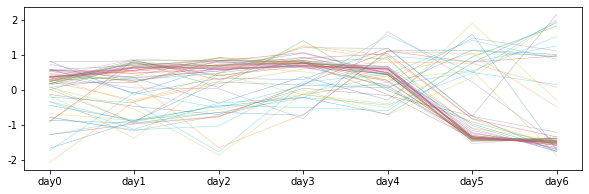

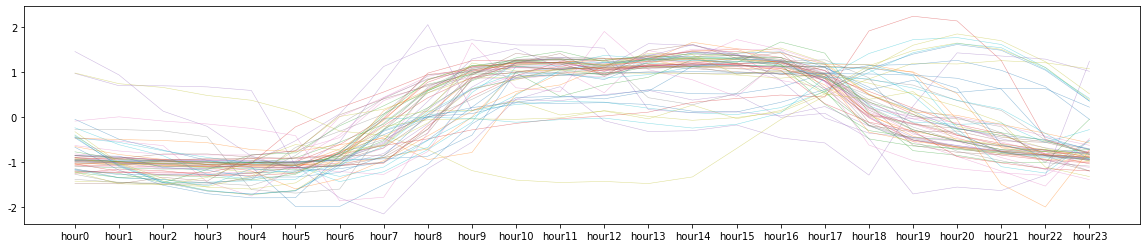

In [53]:
# ÏöîÏùºÏóê Îî∞Î•∏ Í±¥Î¨ºÎ≥Ñ Ï†ÑÎ†•Îüâ
fig = plt.figure(figsize=(10, 3))
for i in range(len(df_wh)):
    plt.plot(df_wh.iloc[i, 1:8], alpha=0.5, linewidth=0.5)

# ÏãúÍ∞ÑÏóê Îî∞Î•∏ Í±¥Î¨ºÎ≥Ñ Ï†ÑÎ†•Îüâ
fig = plt.figure(figsize=(20, 4))
for i in range(len(df_wh)):
    plt.plot(df_wh.iloc[i, 8:], alpha=0.5, linewidth=0.5)

- **ÏöîÏùºÎ≥Ñ**

ÎåÄÎ∂ÄÎ∂Ñ Ï£ºÎßê(day5, 6)Î°ú Í∞àÏàòÎ°ù Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ Ï§ÑÏñ¥Îì§ÏßÄÎßå, ÏùºÎ∂Ä Í±¥Î¨ºÎì§ÏùÄ Í∑∏ÎåÄÎ°ú Ïú†ÏßÄÎêòÍ±∞ÎÇò Ïò§ÌûàÎ†§ Ï¶ùÍ∞ÄÌïúÎã§.

Ï£ºÏ§ëÏóê ÏÇ¨Ïö©ÎüâÏù¥ ÎßéÎã§Î©¥ ÌöåÏÇ¨, Ï£ºÎßêÏóêÎèÑ ÏÇ¨Ïö©ÎüâÏù¥ ÎßéÎã§Î©¥ ÏãùÎãπÏù¥ÎÇò Ïπ¥Ìéò Îì±Ïùº Í≤É Í∞ôÎã§Í≥† Ìï¥ÏÑùÌï† Ïàò ÏûàÎã§.

- **ÏãúÍ∞ÑÎ≥Ñ**

ÎåÄÎ∂ÄÎ∂Ñ Ïò§Ï†Ñ 7Ïãú - 6Ïãú ÏÇ¨Ïù¥Ïóê Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ ÎäòÍ≥†, Í∑∏ Ïù¥ÌõÑÏóî Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•ÏùÑ Î≥¥Ïù∏Îã§.

Ï†ÄÎÖÅÏóêÎèÑ Íæ∏Ï§ÄÌûà ÏÇ¨Ïö©ÎüâÏù¥ ÎäîÎã§Î©¥ ÏãùÎãπ, Ïú†Ìù•ÏãúÏÑ§Í≥º Í∞ôÏùÄ Í≥≥Ïù¥ÎùºÍ≥† Ìï¥ÏÑùÌï† Ïàò ÏûàÎã§.

## 5-2. K-means Clustering

- elbow methodÎ•º ÌÜµÌï¥ ÏµúÏ†ÅÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò Í≤∞Ï†ï


- K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÄ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎÇ¥ Ïò§Ï∞®Ï†úÍ≥±Ìï©(SSE)Ïùò Í∞íÏù¥ ÏµúÏÜåÍ∞Ä ÎêòÎèÑÎ°ù ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Ï§ëÏã¨ÏùÑ Í≤∞Ï†ïÌïòÎäîÎç∞, 

  ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Í∞úÏàòÎ•º ÎäòÎ†§Í∞ÄÎ©∞ SSE Í∞íÏùÑ Í∑∏ÎûòÌîÑÎ°ú Í∑∏Î†§Î≥∏Îã§.


- Ïù¥ Í∑∏ÎûòÌîÑ Î™®ÏñëÏóêÏÑú ÌåîÍøàÏπòÏóê Ìï¥ÎãπÌïòÎäî Î∂ÄÎ∂ÑÏù¥ Ïö∞Î¶¨Í∞Ä Íµ¨ÌïòÍ≥†Ïûê ÌïòÎäî ÏµúÏ†ÅÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàòÏù¥Îã§.

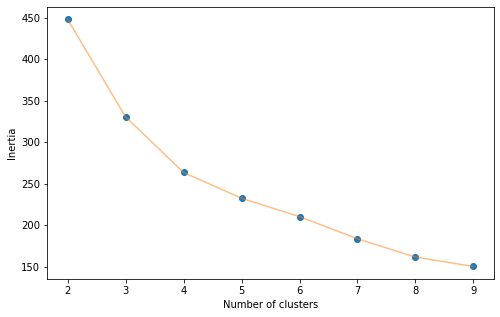

In [54]:
from sklearn.cluster import KMeans

def elbow_method(n_clusters, data):
    SSE = [] # sum of squared distance
    
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        SSE.append(kmeans.inertia_) # Í≥ÑÏÇ∞Îêú SSEÍ∞í
    
    plt.figure(1, figsize=(8, 5))
    plt.plot(n_clusters, SSE, 'o')
    plt.plot(n_clusters, SSE, '-', alpha=0.5)
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")


elbow_method([2, 3, 4, 5, 6, 7, 8, 9], df_wh.iloc[:, 1:]) # numÏó¥ Ï†úÏô∏ Î™®Îì† Îç∞Ïù¥ÌÑ∞

elbow point Îäî 4Î•º Í∞ÄÎ¶¨ÌÇ§Í≥† ÏûàÏúºÎØÄÎ°ú Íµ∞ÏßëÏùò Í∞úÏàòÎäî 4Î°ú ÏßÄÏ†ïÌïúÎã§.

In [55]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_cls = kmeans.fit_predict(df_wh.iloc[:, 1:])

### 5-2-1. Íµ∞ÏßëÎ≥Ñ line Í∑∏ÎûòÌîÑ

In [56]:
df_clust = df_wh.copy()  # train_clust Í∞ùÏ≤¥ ÏÉùÏÑ±
df_clust["kmeans_cls"] = kmeans_cls # cluster Ïó¥ Ï∂îÍ∞Ä
df_clust["kmeans_cls"] = df_clust["kmeans_cls"].map({0:1, 1:3, 2:2, 3:0})

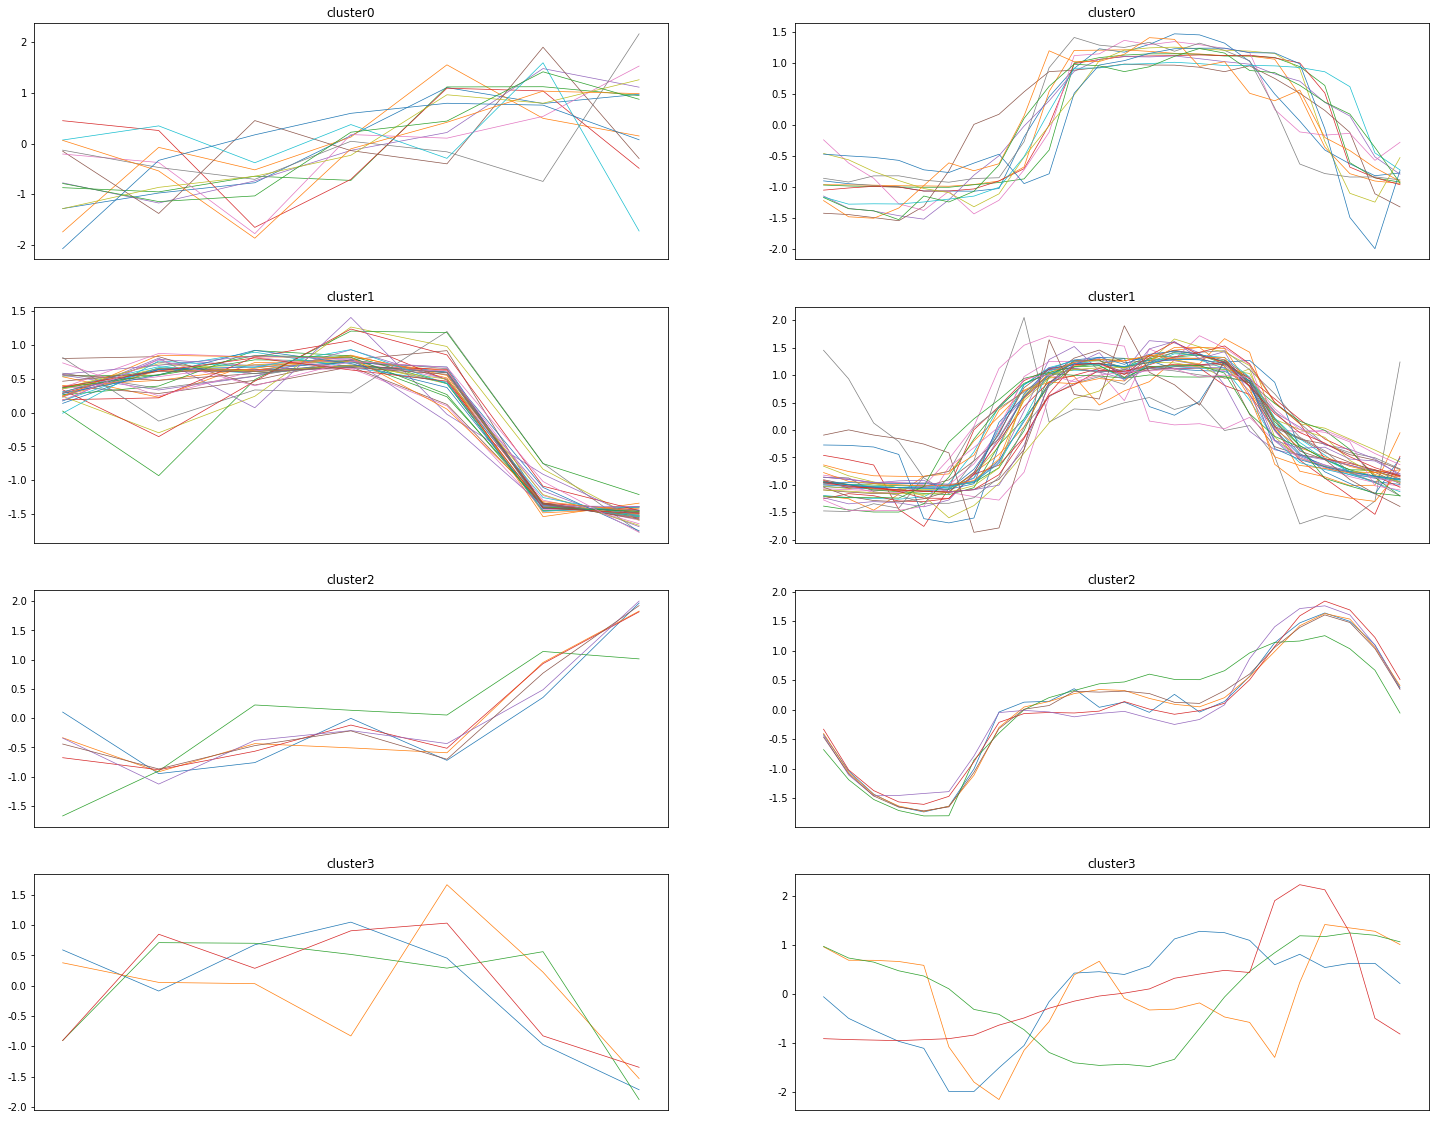

In [57]:
n_cls = df_clust["kmeans_cls"].nunique()

fig = plt.figure(figsize=(25, 20))

for c in range(n_cls):
    temp = df_clust[df_clust["kmeans_cls"] == c]
    
    # day  (ÏôºÏ™Ω Í∑∏ÎûòÌîÑ)
    plt.subplot(n_cls, 2, 2*c+1)
    plt.subplots_adjust(hspace=0.2)
    for i in range(len(temp)):
        plt.plot(temp.iloc[i, 1:8], linewidth=0.7)
        plt.title(f'cluster{c}')
        plt.xticks([])
        plt.xticks() 

    # hour   (Ïò§Î•∏Ï™Ω Í∑∏ÎûòÌîÑ)
    plt.subplot(n_cls, 2, 2*c+2)
    plt.subplots_adjust(hspace=0.2)
    for i in range(len(temp)):
        plt.plot(temp.iloc[i, 8:-1], linewidth=0.7)
        plt.title(f'cluster{c}')
        plt.xticks([])
#         plt.xticks() # ÎààÍ∏à Î≥¥Í≥†Ïã∂Îã§Î©¥

- **cluster 0**

ÏöîÏùºÏù¥ ÏßÄÎÇ†ÏàòÎ°ù Ï†ÑÎ†• ÏÉ§Ïö©ÎüâÏù¥ Ï¶ùÍ∞ÄÌïúÎã§.

9Ïãú-18(9)ÏãúÍπåÏßÄ ÏÇ¨Ïö©ÎüâÏù¥ ÎßéÎã§.


- **cluster 1**

ÌèâÏùºÏóî ÏÇ¨Ïö©ÎüâÏù¥ ÎßéÏßÄÎßå Ï£ºÎßêÏù¥ ÎêòÎ©¥ ÌôïÏó∞Ìûà Í∞êÏÜåÌïúÎã§.


- **cluster 2**

Ï£ºÎßêÏóê ÏÇ¨Ïö©ÎüâÏù¥ ÌòÑÏ†ÄÌïòÍ≤å Ï¶ùÍ∞ÄÌïúÎã§.

Ïò§Ï†ÑÏóê Ìïú Î≤à, Ï†ÄÎÖÅ 5Ïãú Ïù¥ÌõÑÏóê Ìïú Î≤à ÏÇ¨Ïö©ÎüâÏù¥ Í∏âÏ¶ùÌïúÎã§.


- **cluster 3**

Ï£ºÎßêÏóê ÏÇ¨Ïö©ÎüâÏù¥ Í∞êÏÜåÌïúÎã§.

Ïò§ÌõÑÏóê ÏÇ¨Ïö©ÎüâÏù¥ Ï¶ùÍ∞ÄÌïòÎäî ÎìØ Î≥¥Ïù¥ÏßÄÎßå ÎöúÎ†∑Ìïú Í≤ΩÌñ•ÏÑ±Ïù¥ ÎÇòÌÉÄÎÇòÏßÄ ÏïäÎäîÎã§.



### 5-2-2. Íµ∞ÏßëÎ≥Ñ ÌûàÌä∏Îßµ

In [58]:
train = train.merge(df_clust[["num", "kmeans_cls"]], on="num", how="left")
train.head()

num           date_time  energy  temp  windspeed  humidity  precipitation  \
0    1 2020-06-01 00:00:00 8179.06 17.60       2.50     92.00           0.80   
1    1 2020-06-01 01:00:00 8135.64 17.70       2.90     91.00           0.30   
2    1 2020-06-01 02:00:00 8107.13 17.50       3.20     91.00           0.00   
3    1 2020-06-01 03:00:00 8048.81 17.10       3.20     91.00           0.00   
4    1 2020-06-01 04:00:00 8043.62 17.00       3.30     92.00           0.00   

   sun  cooler  solar  ... weekend   THI  sensible    CDH  dayofyear  \
0 0.00    0.00   0.00  ...       0 63.43     17.81  -8.40        153   
1 0.00    0.00   0.00  ...       0 63.57     17.78 -16.70        153   
2 0.00    0.00   0.00  ...       0 63.23     17.44 -25.20        153   
3 0.00    0.00   0.00  ...       0 62.54     16.96 -34.10        153   
4 0.00    0.00   0.00  ...       0 62.40     16.80 -43.10        153   

   energy_sc  solar power  feel_THI  THI_c  kmeans_cls  
0      -2.80         0.00         0    Low           3  
1      -3.13         0.00         0    Low           3  
2      -3.35         0.00         0    Low           3  
3      -3.80         0.00         0    Low           3  
4      -3.84         0.00         0    Low           3  

[5 rows x 25 columns]

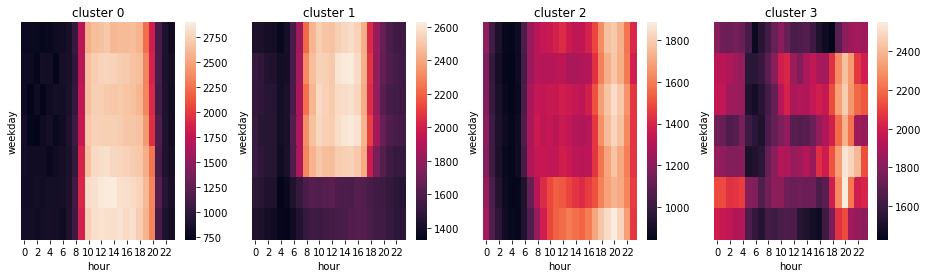

In [59]:
fig = plt.figure(figsize=(20, 4))

for c in range(n_cls):
    temp = train[train["kmeans_cls"] == c]
    temp = temp.groupby(["weekday", "hour"])["energy"].median().reset_index().pivot("weekday", "hour", "energy")
    plt.subplot(1, 5, c+1)
    sns.heatmap(temp)
    plt.title(f'cluster {c}')
    plt.yticks([])

5-2-1Ïùò Í≤∞Í≥ºÏôÄ Ìï®Íªò Ï¢ÖÌï©Ìï¥Î≥¥Î©¥,

- **cluster 0**

Îß§Ïùº 8-20ÏãúÏóê Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ ÌÅ¨Îã§.

Îäò Ï†ÑÎ†•ÏùÑ ÏÜåÎπÑÌïòÎäî ÏãùÎãπ, Ïπ¥Ìéò, ÏÉÅÏ†ê, ÎåÄÌòï Î≥µÌï© ÏáºÌïëÎ™∞Ïù¥ÎùºÍ≥† Ï∂îÏ†ïÌï† Ïàò ÏûàÎã§.


- **cluster 1**

ÌèâÏùº 8-20ÏãúÏóê Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ ÎßéÍ≥†, Ï£ºÎßêÏóê Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ ÏûëÎã§. 

Í∏∞ÏóÖÏ≤¥Î°ú Ï∂îÏ†ïÌï† Ïàò ÏûàÎã§.

- **cluster 2**

Îß§Ïùº Ï†ÄÎÖÅ 16-22ÏãúÏóê Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ ÌÅ¨Îã§. 

Î∞§Ïóê Ïö¥ÏòÅÎêòÎäî Ï£ºÏ†ê, Ïú†Ìù•ÏãúÏÑ§Ïù¥ÎùºÍ≥† Ï∂îÏ†ïÌï† Ïàò ÏûàÎã§.

ÌèâÏùºÎ≥¥Îã® Ï£ºÎßêÏóê ÏÜåÎ™®ÎüâÏù¥ ÏïΩÍ∞Ñ Îçî ÎßéÎã§.


- **cluster 3**

Ïò§Ï†ÑÎ≥¥Îã® Ïò§ÌõÑÎÇò Ï†ÄÎÖÅÏúºÎ°ú Í∞àÏàòÎ°ù Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ Ïª§ÏßÑÎã§. 



Í∑∏ÎûòÌîÑÏôÄ ÌûàÌä∏ÎßµÏúºÎ°ú ÏãúÍ∞ÅÌôîÌïú Í≤∞Í≥º,

Íµ∞Ïßë ÎÇ¥ Ïú†ÏÇ¨ÎèÑÎäî ÎÜíÏúºÎ©∞ Íµ∞Ïßë Í∞Ñ Ïú†ÏÇ¨ÎèÑÎäî ÎÇÆÍ∏∞ ÎïåÎ¨∏Ïóê Íµ∞ÏßëÌôîÍ∞Ä Ïûò ÎêòÏóàÎã§Í≥† Ìï† Ïàò ÏûàÎã§.

Îî∞ÎùºÏÑú **ÎèÑÏ∂úÎêú 4Í∞ÄÏßÄ Íµ∞ÏßëÎ≥ÑÎ°ú Î∂ÑÏÑù**ÌïòÍ≥†Ïûê ÌïúÎã§.

## 5-3. Íµ∞Ïßë Î≥Ñ ÌäπÏÑ± Î∂ÑÏÑù

### 5-3-1. Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑† Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ 

In [60]:
energy_mean = train.groupby("kmeans_cls")["energy"].mean()
energy_mean

kmeans_cls
0   2170.39
1   2431.57
2   1315.26
3   3353.81
Name: energy, dtype: float64

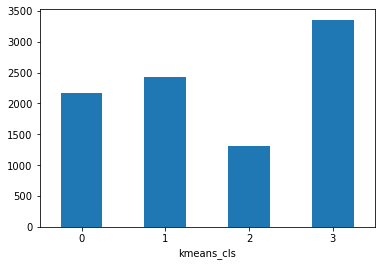

In [61]:
energy_mean.plot.bar(rot=0);

cluster3 Íµ∞ÏßëÏùò ÌèâÍ∑† Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ Í∞ÄÏû• ÎßéÎã§.

### 5-3-2. Íµ∞ÏßëÎ≥Ñ Ï†ÑÎ†•ÏÇ¨Ïö©ÎüâÍ≥º Í∏∞ÌõÑ ÏöîÏÜå ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

In [62]:
temp0 = train[train['kmeans_cls'] == 0][['energy','temp','windspeed','humidity','precipitation','sun']]
temp1 = train[train['kmeans_cls'] == 1][['energy','temp','windspeed','humidity','precipitation','sun']]
temp2 = train[train['kmeans_cls'] == 2][['energy','temp','windspeed','humidity','precipitation','sun']]
temp3 = train[train['kmeans_cls'] == 3][['energy','temp','windspeed','humidity','precipitation','sun']]

In [63]:
temp0.corrwith(temp0['energy'], method = 'spearman')

energy           1.00
temp             0.28
windspeed        0.38
humidity        -0.10
precipitation   -0.03
sun              0.30
dtype: float64

In [64]:
temp1.corrwith(temp1['energy'], method = 'spearman')

energy           1.00
temp             0.21
windspeed        0.09
humidity        -0.10
precipitation    0.00
sun              0.17
dtype: float64

In [65]:
temp2.corrwith(temp2['energy'], method = 'spearman')

energy           1.00
temp             0.48
windspeed        0.06
humidity        -0.15
precipitation    0.02
sun              0.09
dtype: float64

In [66]:
temp3.corrwith(temp3['energy'], method = 'spearman')

energy           1.00
temp             0.09
windspeed        0.24
humidity        -0.04
precipitation   -0.00
sun             -0.01
dtype: float64

**ÏöîÏïΩ** 

|Ìï≠Î™©|Cluster 0|Cluster 1|Cluster 2|Cluster 3| 
|:---:|:---:|:---:|:---:|:---:| 
|Í∏∞Ïò®(¬∞C)|0.09|**0.21**|**0.28**|**0.48**| 
|ÌíçÏÜç(m/s)|**0.24**|0.09|**0.38**|0.06| 
|ÏäµÎèÑ(%)|-0.04|-0.10|-0.10|-0.15| 
|Í∞ïÏàòÎüâ(mm)|-0.00|0.00|-0.03|-0.02| |
ÏùºÏ°∞(hr)|-0.01|0.17|**0.30**|0.09|

### 5-3-3. Íµ∞ÏßëÎ≥Ñ Ï†ÑÎ†•ÏÇ¨Ïö©ÎüâÍ≥º Í∏∞ÌõÑ ÏöîÏÜå ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ

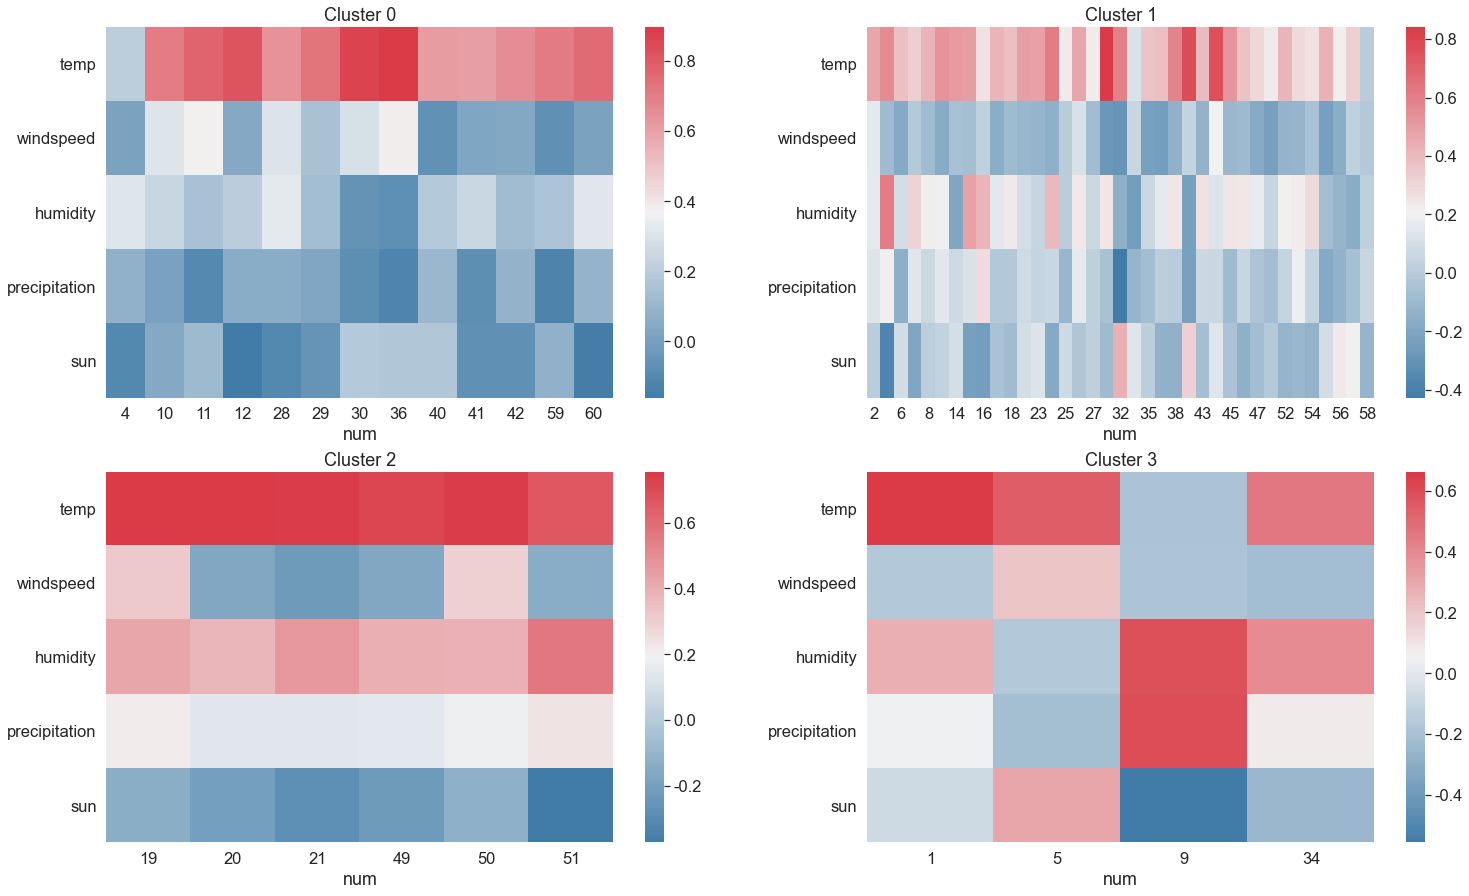

In [67]:
corrs4 = []
for c in range(4):
    data = train[train['kmeans_cls'] == c]
    nums = data['num'].unique()
    data = data.groupby(['num', 'date'])[['energy','temp','windspeed','humidity','precipitation','sun']].mean().reset_index()
    
    corrs = []
    for num in nums:
        corr = []
        corr.append(num)
        for col in ['temp','windspeed','humidity','precipitation','sun']:
            corr.append(spearmanr(data.loc[data.num == num, 'energy'], data.loc[data.num == num, col]).correlation)
        corrs.append(corr)
    corrs4.append(corrs)


fig = plt.figure(figsize = (25, 15), constrained_layout=False)
for i, corrs in enumerate(corrs4):
    data = pd.DataFrame(np.array(corrs), columns = ['num','temp','windspeed','humidity','precipitation','sun'])
    data['num'] = data['num'].astype(int)
    data = data.set_index('num')

    sns.set(font_scale = 1.5)
    plt.subplot(2, 2, i+1)
    sns.heatmap(data.transpose(), cmap = sns.diverging_palette(240,10, as_cmap = True))
    plt.title(f'Cluster {i}')

- **Cluster 0**

Í∏∞Ïò®Í≥º ÎÜíÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏúºÎ©∞, Îã§Î•∏ Íµ∞ÏßëÎì§Ïóê ÎπÑÌï¥ Í∏∞ÌõÑÏôÄ ÏÉÅÍ¥ÄÏù¥ ÏûàÎäî Íµ∞ÏßëÏûÑÏùÑ Ïú†Ï∂îÌï† Ïàò ÏûàÎã§.

- **Cluster 1**

Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í∏∞ÌõÑÏôÄ ÏÉÅÍ¥ÄÏù¥ ÏóÜÏßÄÎßå Í∏∞Ïò®Í≥º ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§.

- **Cluster 2**

Íµ∞Ïßë Ï§ë Í∏∞Ïò®Í≥º Í∞ÄÏû• ÎÜíÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎäî Íµ∞ÏßëÏù¥Îã§.

Í∏∞Ïò®Í≥º ÏäµÎèÑÏôÄ ÎπÑÍµêÏ†Å ÎÜíÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÑÎã§.

Í±¥Î¨ºÎßàÎã§ ÌíçÏÜçÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏÉÅÏù¥ÌïòÎã§.

- **Cluster 3**

ÎöúÎ†∑Ìïú Íµ∞Ïßë ÌäπÏÑ±Ïù¥ ÎìúÎü¨ÎÇòÏßÄ ÏïäÎäîÎã§.

### 5-3-4. Íµ∞ÏßëÎ≥Ñ Ï†ÑÎ†•ÏÇ¨Ïö©ÎüâÍ≥º Í∞úÎ≥Ñ Í∏∞ÌõÑ ÏöîÏÜå ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî

In [68]:
# Í∏∞ÌõÑ ÏöîÏÜå ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÏãúÍ∞ÅÌôîÌï¥Ï£ºÎäî Ìï®Ïàò
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏóÜÎã§Í≥† Ìï† Ïàò ÏûàÎäî ÏäµÎèÑ, Í∞ïÏàòÎüâÏóê ÎåÄÌï¥ÏÑúÎäî ÏãúÍ∞ÅÌôîÌïòÏßÄ ÏïäÏùå.

def draw_4chart(data, col = 'temp'):
    fig = plt.figure(figsize = (20, 4))
    for c in range(4):
        temp = data[data.kmeans_cls == c]
        temp = temp.groupby([col])[['energy']].mean().reset_index()
        plt.subplot(1, 5, c+1)
        sns.regplot(data = temp, x = col, y = 'energy')
        plt.title(f'cluster {c}')
        plt.xlabel('')
        plt.ylabel('')

**Í∏∞Ïò®**

- Cluster 3ÏùÑ Ï†úÏô∏Ìïú Cluster 0, 1, 2ÏóêÏÑú Í∏∞Ïò®Ïù¥ Ï¶ùÍ∞ÄÌï®Ïóê Îî∞Îùº Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÎèÑ Ìï®Íªò Ï¶ùÍ∞ÄÌïòÎäî Î™®ÏäµÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

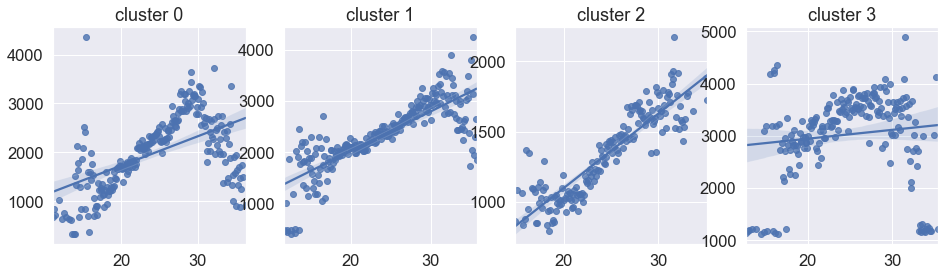

In [69]:
draw_4chart(train, 'temp')

**ÌíçÏÜç**

- Cluster 0ÏóêÏÑú ÌíçÏÜçÏù¥ Îπ†Î•ºÏàòÎ°ù Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§.
- Cluster 1, 2ÏóêÏÑú ÌíçÏÜçÏù¥ Îπ†Î•ºÏàòÎ°ù Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§.

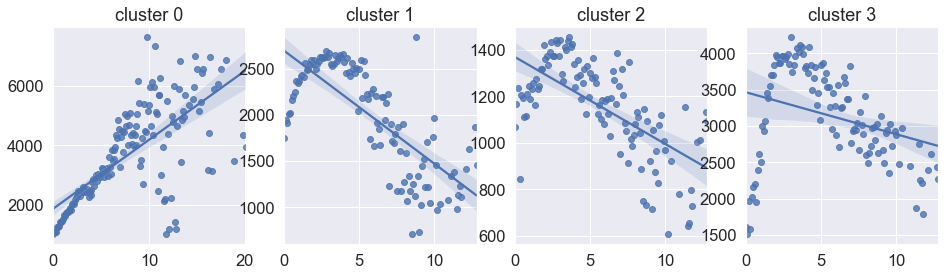

In [70]:
draw_4chart(train, 'windspeed')

**ÏùºÏ°∞**

- cluster0Ïùò Í≤ΩÏö∞ Í≤ΩÎØ∏Ìïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù∏Îã§Í≥† Ìï† Ïàò ÏûàÎã§.

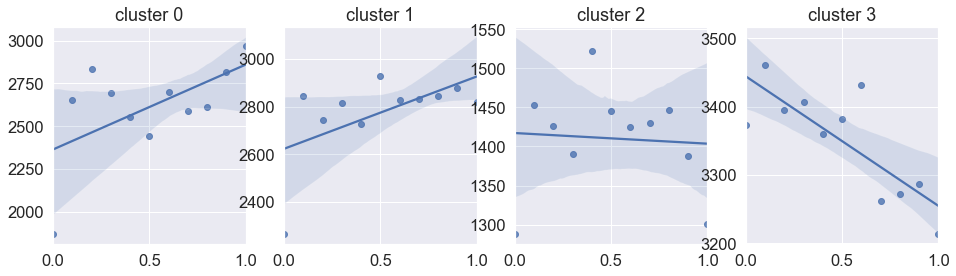

In [71]:
draw_4chart(train, 'sun')

### 5-3-5. CDH, THI, sensibleÍ≥º Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
- ÏÉàÎ°≠Í≤å ÎßåÎì† Î≥ÄÏàòÏù∏ CDH, THI(Î∂àÏæåÏßÄÏàò), sensible(Ï≤¥Í∞êÏò®ÎèÑ)Ïù¥ Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÍ≥º ÏñºÎßàÎÇò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïúÎã§.

In [72]:
df_0 = train[train["kmeans_cls"] == 0]
df_1 = train[train["kmeans_cls"] == 1]
df_2 = train[train["kmeans_cls"] == 2]
df_3 = train[train["kmeans_cls"] == 3]

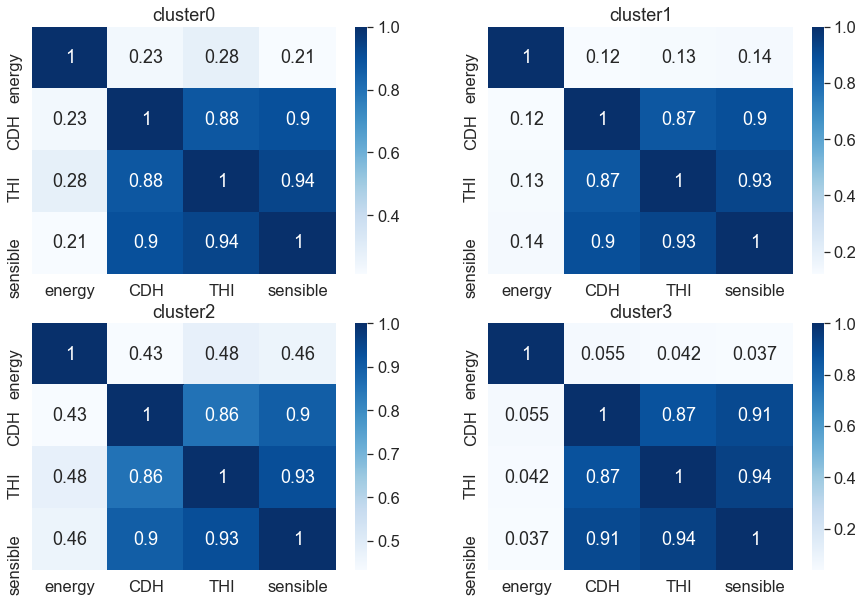

In [73]:
df_0_new = df_0[["energy", "CDH", "THI", "sensible"]]
df_1_new = df_1[["energy", "CDH", "THI", "sensible"]]
df_2_new = df_2[["energy", "CDH", "THI", "sensible"]]
df_3_new = df_3[["energy", "CDH", "THI", "sensible"]]

fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('cluster0')
sns.heatmap(df_0_new.corr(), cmap="Blues", annot=True)

plt.subplot(2, 2, 2)
plt.title('cluster1')
sns.heatmap(df_1_new.corr(), cmap="Blues", annot=True)

plt.subplot(2, 2, 3)
plt.title('cluster2')
sns.heatmap(df_2_new.corr(), cmap="Blues", annot=True)

plt.subplot(2, 2, 4)
plt.title('cluster3')
sns.heatmap(df_3_new.corr(), cmap="Blues", annot=True)

plt.show();

cluster0, cluster1, cluster3ÏóêÏÑú CDH, THI, sensibleÍ≥º Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏùÄ ÎÇÆÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù∏Îã§.

Í∑∏Ïóê Î∞òÎ©¥ **cluster2ÏùÄ ÏÑ∏ Î≥ÄÏàò Î™®Îëê ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä 0.4 Ïù¥ÏÉÅ**ÏúºÎ°ú Îã§Î•∏ Íµ∞ÏßëÎì§Ïóê ÎπÑÌï¥ ÎÜíÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù∏Îã§.

### üß§ 5-3-6. CDHÏôÄ Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

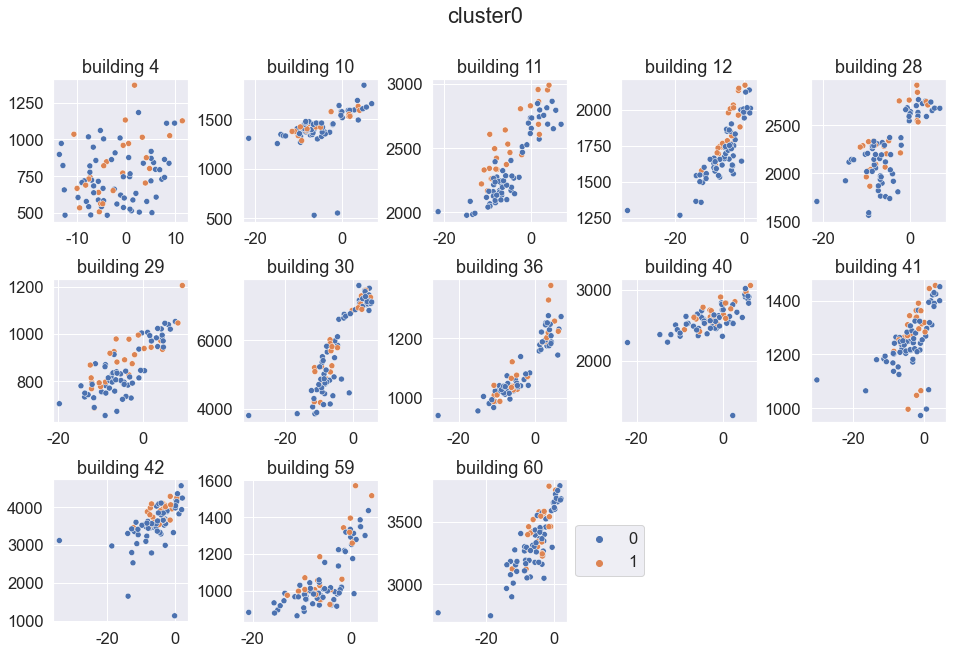

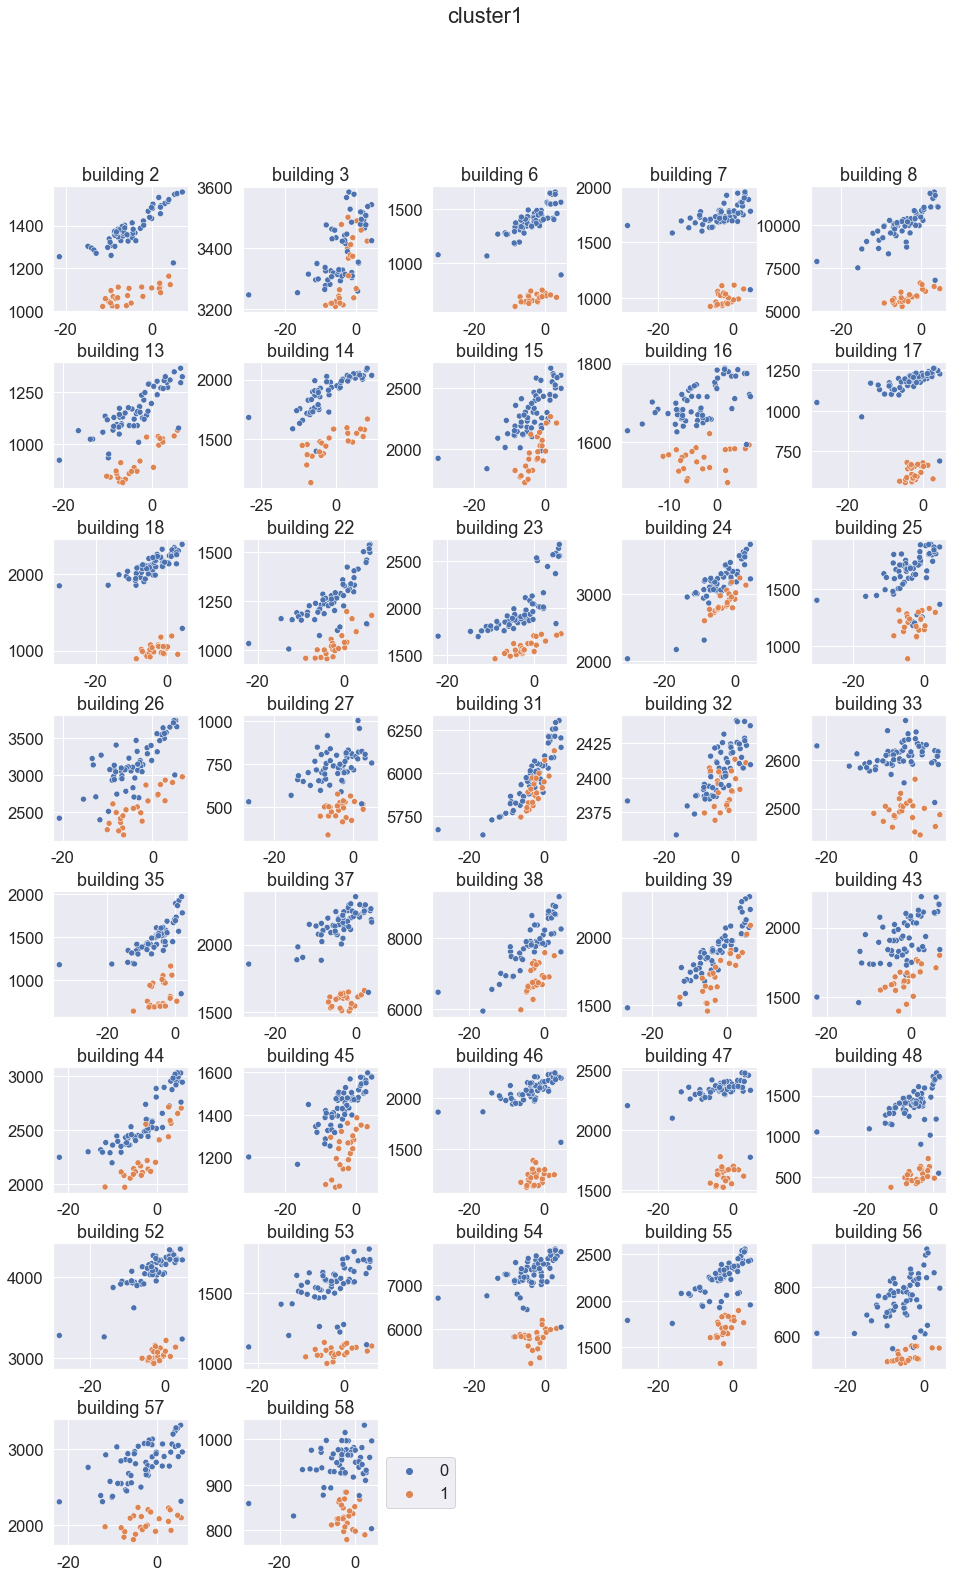

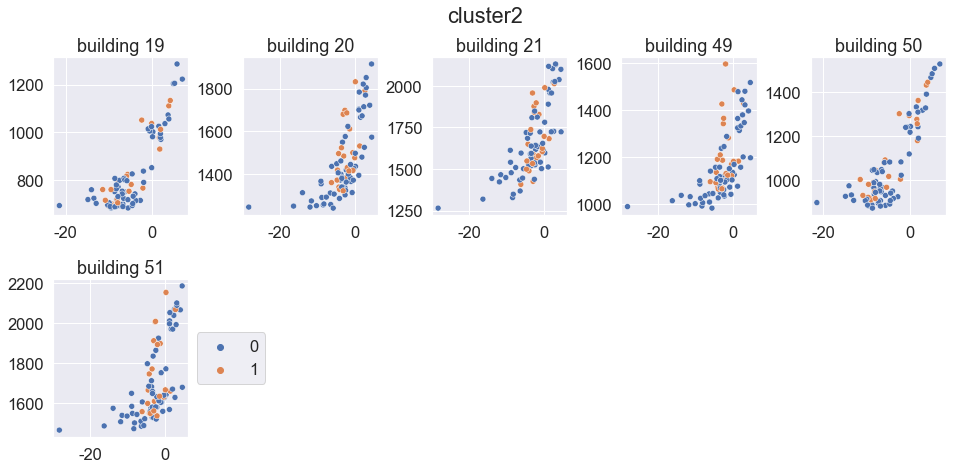

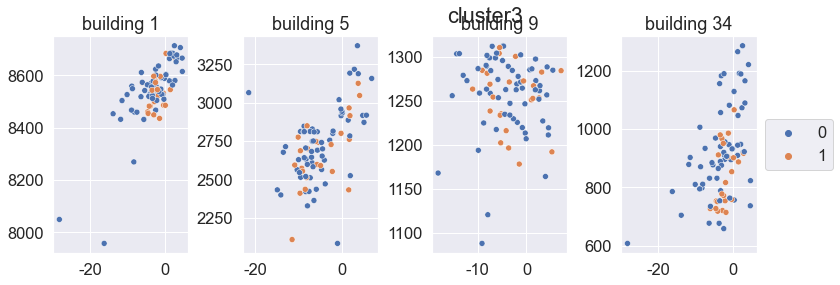

In [74]:
for c in range(n_cls):
    temp1 = train[train["kmeans_cls"] == c]
    nums = np.unique(temp1.num)
    n_nums = len(nums)
    fig = plt.figure(figsize = (16, 3*(n_nums//5+1)+1))
    plt.suptitle(f'cluster{c}')
    for i, num in enumerate(nums):
        temp2 = temp1[temp1.num == num]
        temp2_tg = temp2.groupby(['num', 'date', 'weekend'])[['energy']].mean().reset_index()
        temp2_cdh = temp2.groupby(['num', 'date', 'weekend'])[['CDH']].mean().reset_index()
        temp2 = temp2_tg.merge(temp2_cdh, on=['num', 'date', 'weekend'], how='left')
        plt.subplot(n_nums//5+1, 5, i+1)
        sns.scatterplot(data = temp2, x='CDH', y='energy', hue='weekend')
        plt.legend([],[], frameon=False)
        plt.title(f'building {num}')
        plt.ylabel('')
        plt.xlabel('')
        plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
        
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

cluster 0, 3Ïùò Í±¥Î¨ºÎì§ÏùÄ ÏùºÌèâÍ∑† CDHÏôÄ ÏùºÌèâÍ∑† Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÍ≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§Îäî Í≤ÉÏùÑ Ïú†Ï∂îÌï¥Î≥º Ïàò ÏûàÎã§.

CDHÍ∞Ä Ïò¨ÎùºÍ∞àÏàòÎ°ù Ï†ÑÎ†• ÏÜåÎ™®ÎüâÎèÑ Ï¶ùÍ∞ÄÌïòÎäî ÏñëÏÉÅÏùÑ Î≥¥Ïù∏Îã§.

ÌäπÌûà cluster1ÏùÄ ÌèâÏùºÍ≥º Ï£ºÎßêÏùò Ï†ÑÎ†• ÏÜåÎ™®ÎüâÏù¥ ÌôïÏó∞Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÎã§.

cluster3ÏùÄ CDHÏùò Î≥ÄÌôîÏôÄ Ï†ÑÎ†• ÏÜåÎ™®ÎüâÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÌÅ¨Í≤å Ìè¨Ï∞©ÎêòÏßÄ ÏïäÎäîÎã§.

### üß§ 5-3-7. Í∞Å Íµ∞ÏßëÎ≥Ñ Cooler, Solar Ïú†Î¨¥ÏôÄ Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏùò Í¥ÄÍ≥Ñ

In [75]:
df = [df_0, df_1, df_2, df_3]

In [76]:
train.groupby(["kmeans_cls", "num"])["energy"].mean().reset_index().groupby(["kmeans_cls"])

In [77]:
cs_temp = train.groupby(['kmeans_cls', "num"]).max().reset_index().groupby(["kmeans_cls"])["cooler", "solar"].sum()
cs_temp

<ipython-input-77-26d5bed41830>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cs_temp = train.groupby(['kmeans_cls', "num"]).max().reset_index().groupby(["kmeans_cls"])["cooler", "solar"].sum()


cooler  solar
kmeans_cls               
0            10.00   7.00
1            29.00  18.00
2             0.00   2.00
3             2.00   2.00

In [78]:
# Ìïú Í±¥Î¨ºÎãπ Î†àÏΩîÎìúÎäî Ï¥ù 2040Í∞ú
cs_temp["building"] = train.groupby(["kmeans_cls"])["num"].count() / 2040 # ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≥ÑÎ°ú 13, 37, 6, 4Í∞úÏùò Í±¥Î¨º
cs_temp["cooler_rate"] = cs_temp.cooler / cs_temp.building
cs_temp["solar_rate"] = cs_temp.solar / cs_temp.building
cs_temp

cooler  solar  building  cooler_rate  solar_rate
kmeans_cls                                                  
0            10.00   7.00     13.00         0.77        0.54
1            29.00  18.00     37.00         0.78        0.49
2             0.00   2.00      6.00         0.00        0.33
3             2.00   2.00      4.00         0.50        0.50

**Cooler**
- Cluster 0, Cluster 1Ïóê coolerÍ∞Ä ÎßéÏù¥ ÏÑ§ÏπòÎêú Î∞òÎ©¥, Cluster 2ÏóêÎäî coolerÍ∞Ä ÏÑ§ÏπòÎêòÏñ¥ ÏûàÏßÄ ÏïäÎã§.
- Ïù¥Îäî Ï£ºÍ∞Ñ-ÏïºÍ∞ÑÏóê Í≥®Í≥†Î£® Ï†ÑÎ†• ÏÜåÎ™®ÎüâÏù¥ ÎßéÏùÄ Í±¥Î¨ºÎì§(ÌöåÏÇ¨, ÏÉÅÍ∞Ä Îì±)Ïóî ÏÑ§ÏπòÏú®Ïù¥ ÎÜíÍ≥†, ÏïºÍ∞ÑÏóê Ï†ÑÎ†• ÏÜåÎ™®ÎüâÏù¥ ÎßéÏùÄ Ï£ºÏ†ê, Í∏∞ÏóÖÏ≤¥Îì§Ïóî ÏÑ§ÏπòÏú®Ïù¥ ÎÇÆÏùåÏùÑ Ïïå Ïàò ÏûàÎã§.

**Solar**
- SolarÎäî Î™®Îì† Í±¥Î¨º Ïú†ÌòïÏóêÏÑú Ïú†ÏÇ¨Ìïú ÎπÑÏú®Î°ú ÏÑ§ÏπòÍ∞Ä ÎêòÏñ¥ÏûàÎäîÎç∞, Ï£ºÎ°ú Î∞§Ïóê Ï†ÑÎ†•ÏùÑ ÏÜåÎ™®ÌïòÎäî Cluster 2Ïùò Í≤ΩÏö∞ ÏÑ§ÏπòÏú®Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÎã§.

<ipython-input-79-ff28a5bcc414>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sns.barplot(data=train.groupby(['kmeans_cls', "num"]).mean().reset_index().groupby(["kmeans_cls", "cooler"])["temp", "energy"].mean().reset_index(),
<ipython-input-79-ff28a5bcc414>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sns.barplot(data=train.groupby(['kmeans_cls', "num"]).mean().reset_index().groupby(["kmeans_cls", "solar"])["temp", "energy"].mean().reset_index(),


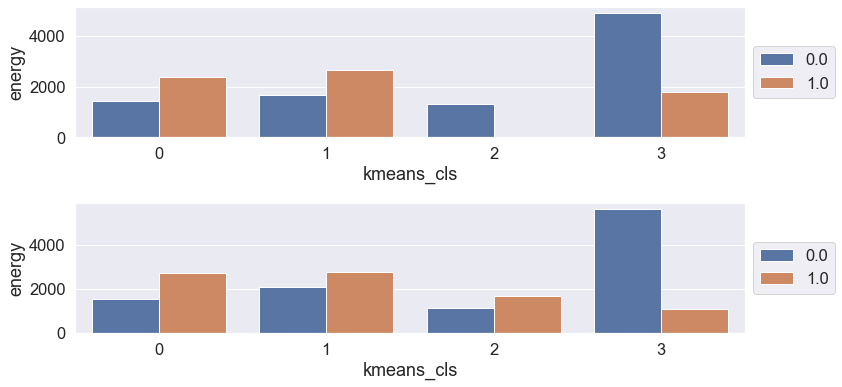

In [79]:
fig = plt.figure(figsize=(12, 6))

# Íµ∞ÏßëÎ≥Ñ cooler ÏÑ§Ïπò Ïú†Î¨¥ energy ÌèâÍ∑†Îüâ
plt.subplot(2, 1, 1)
sns.barplot(data=train.groupby(['kmeans_cls', "num"]).mean().reset_index().groupby(["kmeans_cls", "cooler"])["temp", "energy"].mean().reset_index(),
            x="kmeans_cls", y="energy", hue="cooler")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Íµ∞ÏßëÎ≥Ñ cooler ÏÑ§Ïπò Ïú†Î¨¥ solar ÌèâÍ∑†Îüâ
plt.subplot(2, 1, 2)
sns.barplot(data=train.groupby(['kmeans_cls', "num"]).mean().reset_index().groupby(["kmeans_cls", "solar"])["temp", "energy"].mean().reset_index(),
            x="kmeans_cls", y="energy", hue="solar")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(hspace=0.5)

plt.show()

- Cluster 0Í≥º 1ÏùÄ coolerÏôÄ solarÍ∞Ä ÏÑ§ÏπòÎêú ÎπÑÏú®ÎèÑ ÎßéÏïòÎäîÎç∞ Í∑∏ÎßåÌÅº ÏÑ§ÏπòÎêú Í±¥Î¨ºÏóêÏÑú Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÎèÑ ÎÜíÏïòÎã§.
- Cluster 2ÏôÄ 3Ïùò Í≤ΩÏö∞ coolerÏôÄ solarÍ∞Ä ÏÑ§ÏπòÎêòÏßÄ ÏïäÏùÄ Í±¥Î¨ºÎì§ÏóêÏÑú Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ ÎÜíÍ≤å ÎÇòÏôîÎã§.

## üß§ 5-4. Íµ∞Ïßë Î∂ÑÏÑù Ï†ïÎ¶¨

- **cluster 0**

Ï£ºÎßêÏóê ÏÇ¨Ïö©ÎüâÏù¥ Í∞êÏÜå

Ïò§ÌõÑÏóê ÏÇ¨Ïö©ÎüâÏù¥ Ï¶ùÍ∞ÄÌïòÎäî ÎìØ Î≥¥Ïù¥ÏßÄÎßå ÎöúÎ†∑Ìïú Í≤ΩÌñ•ÏÑ±Ïù¥ ÎÇòÌÉÄÎÇòÏßÄ ÏïäÎäîÎã§.

ÎöúÎ†∑Ìïú Íµ∞ÏßëÌäπÏÑ±Ïù¥ ÎìúÎü¨ÎÇòÏßÄ ÏïäÎäîÎã§.

CDH, THI, sensibleÍ≥º Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏùÄ ÎÇÆÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

coolerÍ∞Ä ÏÑ§ÏπòÎêòÏñ¥ ÏûàÎäî ÎπÑÏú®Ïù¥ ÎßéÍ≥†, ÏÑ§ÏπòÎêú Í±¥Î¨ºÏóêÏÑú Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ ÎÜíÎã§.

- **cluster 1**

ÌèâÏùºÏóî ÏÇ¨Ïö©ÎüâÏù¥ ÎßéÏßÄÎßå Ï£ºÎßêÏù¥ ÎêòÎ©¥ ÌôïÏó∞Ìûà Í∞êÏÜåÌïúÎã§.

Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í∏∞ÌõÑÏôÄ ÏÉÅÍ¥ÄÏù¥ ÏóÜÏßÄÎßå Í∏∞Ïò®Í≥º ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§.

ÎåÄÏ≤¥Î°ú Í∏∞Ïò®Í≥º ÏäµÎèÑÏùò ÏòÅÌñ•ÏùÑ ÎßéÏù¥ Î∞õÎäî Í±¥Î¨ºÎì§ -> Î∂àÏæåÏßÄÏàò  Ïó∞Í¥Ä

ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÌíçÏÜçÏùò ÏòÅÌñ•Ïù¥ Ï†ÅÏùå

Í∏∞Ïò®Ïù¥ Ï¶ùÍ∞ÄÌï®Ïóê Îî∞Îùº Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÎèÑ Ìï®Íªò Ï¶ùÍ∞ÄÌïòÎäî Î™®ÏäµÏùÑ ÌôïÏù∏

ÌíçÏÜçÏù¥ Îπ†Î•ºÏàòÎ°ù Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•

CDH, THI, sensibleÍ≥º Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏùÄ ÎÇÆÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

coolerÍ∞Ä ÏÑ§ÏπòÎêòÏñ¥ ÏûàÎäî ÎπÑÏú®Ïù¥ ÎßéÍ≥†, ÏÑ§ÏπòÎêú Í±¥Î¨ºÏóêÏÑú Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ ÎÜíÎã§.


- **cluster 2**

ÏöîÏùºÏù¥ ÏßÄÎÇ†ÏàòÎ°ù Ï†ÑÎ†• ÏÉ§Ïö©ÎüâÏù¥ Ï¶ùÍ∞ÄÌïúÎã§.

9Ïãú-18(9)ÏãúÍπåÏßÄ ÏÇ¨Ïö©ÎüâÏù¥ ÎßéÎã§.

Í∏∞Ïò®, ÌíçÏÜç, ÏùºÏ°∞ÏôÄ Îã§Î•∏ Íµ∞ÏßëÎì§Ïóê ÎπÑÌï¥ ÎÜíÏùÄ ÏñëÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä ÏûàÏúºÎ©∞, ÎπÑÍµêÏ†Å Í∏∞ÌõÑÏôÄ ÏÉÅÍ¥ÄÏù¥ ÏûàÎäî Íµ∞ÏßëÏûÑÏùÑ Ïú†Ï∂îÌï† Ïàò ÏûàÎã§.

Í±¥Î¨ºÎßàÎã§ ÏäµÎèÑ Î∞è ÌíçÏÜçÏùò ÏòÅÌñ•Ïù¥ ÏÉÅÏù¥Ìï®

ÌíçÏÜçÏù¥ Îπ†Î•ºÏàòÎ°ù Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§.

CDH, THI, sensibleÍ≥º ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

coolerÍ∞Ä ÏÑ§ÏπòÎêòÏñ¥ ÏûàÎäî Í±¥Î¨ºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäîÎã§. solarÍ∞Ä ÏÑ§ÏπòÎêú Í±¥Î¨ºÎì§ÏóêÏÑú Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ ÎÜíÎã§.


- **cluster 3**

Ï£ºÎßêÏóê ÏÇ¨Ïö©ÎüâÏù¥ ÌòÑÏ†ÄÌïòÍ≤å Ï¶ùÍ∞ÄÌïúÎã§.

Ïò§Ï†ÑÏóê Ìïú Î≤à, Ï†ÄÎÖÅ 5Ïãú Ïù¥ÌõÑÏóê Ìïú Î≤à ÏÇ¨Ïö©ÎüâÏù¥ Í∏âÏ¶ùÌïúÎã§.

Íµ∞Ïßë Ï§ë Í∏∞Ïò®Í≥º Í∞ÄÏû• ÎÜíÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎäî Íµ∞ÏßëÏù¥Îã§.

ÎåÄÏ≤¥Î°ú Í∏∞Ïò®Í≥º ÏäµÎèÑÏùò ÏòÅÌñ•ÏùÑ ÎßéÏù¥ Î∞õÎäî Í±¥Î¨ºÎì§

Í±¥Î¨ºÎßàÎã§ ÌíçÏÜçÏùò ÏòÅÌñ•Ïù¥ ÏÉÅÏù¥Ìï®

ÌíçÏÜçÏù¥ Îπ†Î•ºÏàòÎ°ù Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§.

Í∏∞Ïò®Ïù¥ Ï¶ùÍ∞ÄÌï®Ïóê Îî∞Îùº Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÎèÑ Ìï®Íªò Ï¶ùÍ∞ÄÌïòÎäî Î™®Ïäµ

CDH, THI, sensible Î™®Îëê ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä 0.4 Ïù¥ÏÉÅ ÏúºÎ°ú Îã§Î•∏ Íµ∞ÏßëÎì§Ïóê ÎπÑÌï¥ ÎÜíÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

cooler, solarÏùò ÏÑ§Ïπò Ïú†Î¨¥Í∞Ä Î∞òÎ∞òÏù¥Í≥†, Î™®Îëê ÏÑ§ÏπòÎêòÏßÄ ÏïäÏùÄ Í±¥Î¨ºÎì§ÏóêÏÑú Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ ÎÜíÎã§.

## ÏúÑÏùò Ï†ïÎ¶¨Îêú ÌäπÏßï+ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Î°ú Ìï¥Îãπ Íµ∞ÏßëÏùÄ Ïñ¥Îñ§ Í±¥Î¨ºÏùºÏßÄ(ÌïôÍµê, ÏãùÎãπ, Ïú†Ìù•Ï£ºÏ†ê ..) Ïú†Ï∂îÌï¥Î≥¥Î©¥ Îê† Í≤É Í∞ôÏïÑÏöî!

### ÏïÑÎßà ÏùºÎ≥Ñ, ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ Í∞ÄÏû• Ïú†Ï∂îÌïòÍ∏∞ Ï¢ãÏùÄ ÏßÄÌëúÏùº Í≤É Í∞ôÏùÄÎç∞ Îã§Î•∏ Îç∞Ïù¥ÌÑ∞(Îâ¥Ïä§ Í∏∞ÏÇ¨, ÎÖºÎ¨∏ ..)Í∞Ä ÏûàÏùÑ ÏàòÎèÑ ÏûàÏúºÎãà Ìïú Î≤à Ï∞æÏïÑÎ≥¥Í≥† Î∂ôÏùº Ïàò ÏûàÏúºÎ©¥ Î∂ôÏù¥ÎäîÍ≤å Ï¢ãÏùÑ Í≤É Í∞ôÏäµÎãàÎã§!

# 6. Ï∞∏Í≥† ÎßÅÌÅ¨

- https://dacon.io/competitions/official/235736/codeshare/2743?page=1&dtype=recent

- https://www.dacon.io/competitions/official/235736/codeshare/2844?page=2&dtype=recent

- https://dacon.io/competitions/official/235736/codeshare/2835?page=1&dtype=recent